In [1]:
#Importing the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Here after taking out dates and months out of pdate feature a csv of it is loaded
df = pd.read_csv("datesample.csv", index_col = False)

In [3]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [4]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


<AxesSubplot:>

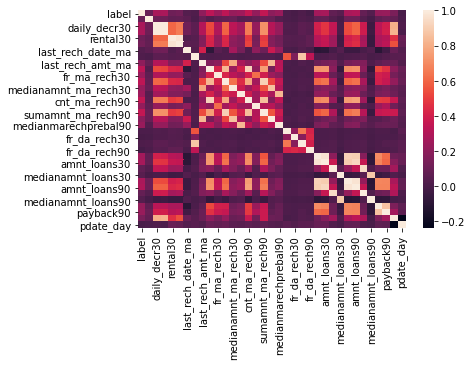

In [5]:
#Here heatmap is used to visualize the correlation between features
sns.heatmap(df.corr(method = "spearman"))

# Exploratory Data Analysis

In [6]:
# Here the features are classified into numerical features and discrete features. 
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


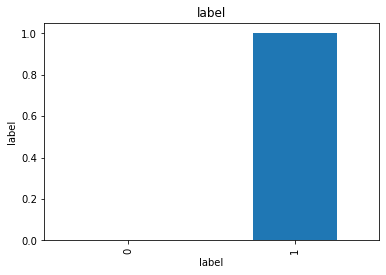

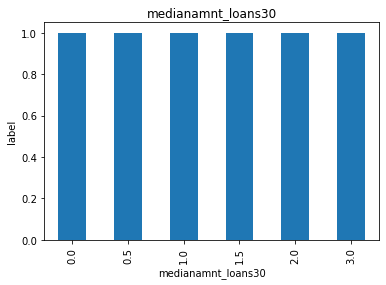

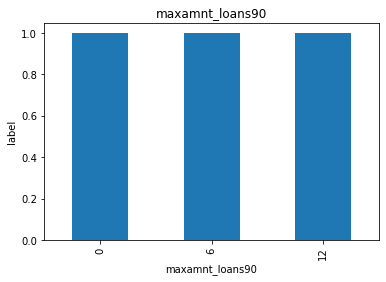

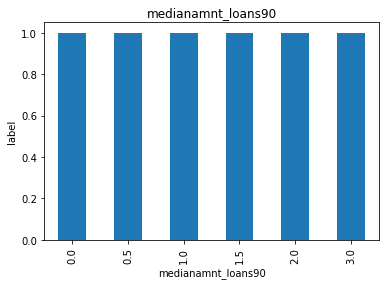

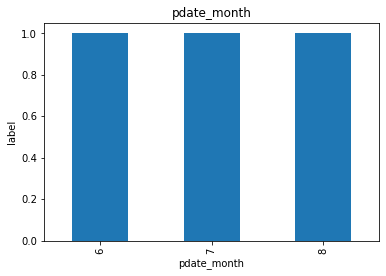

In [7]:
# Visualizing a barplot to bring out a relationship between independent features and the dependent feature
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['label'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("label")
    plt.title(feature)
    plt.show()

In [8]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

In [9]:
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 30


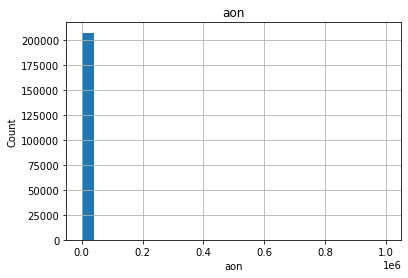

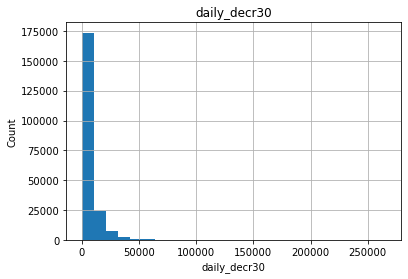

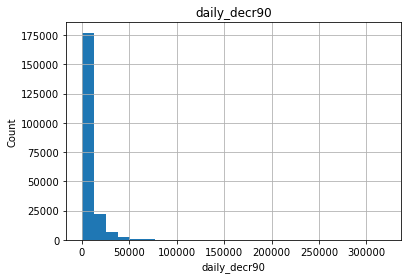

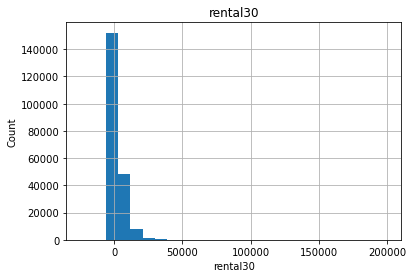

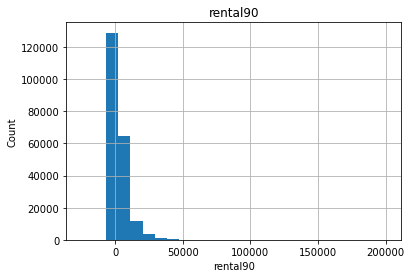

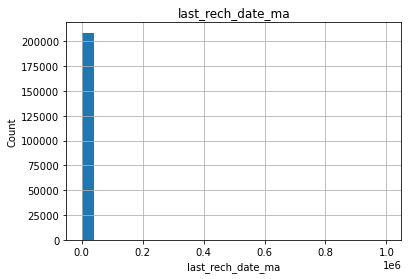

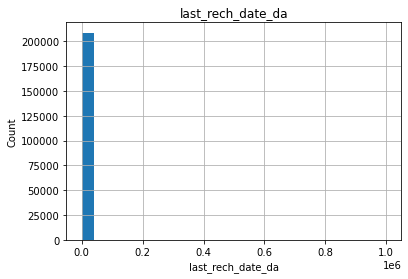

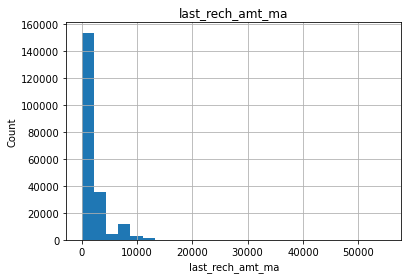

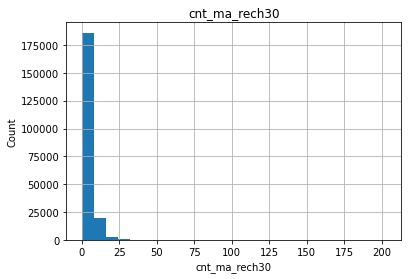

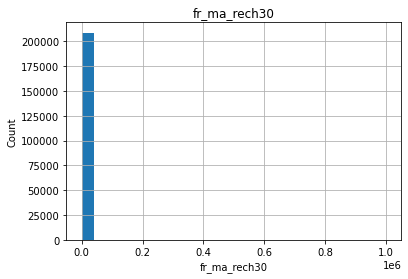

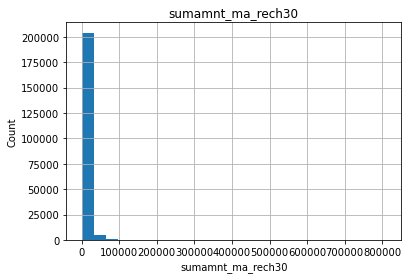

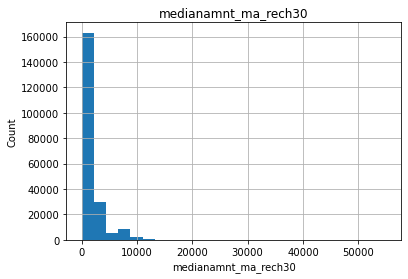

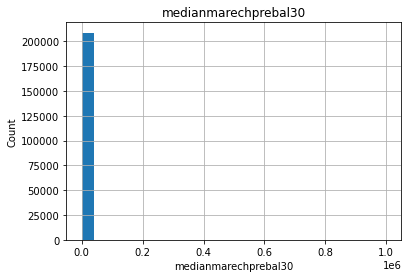

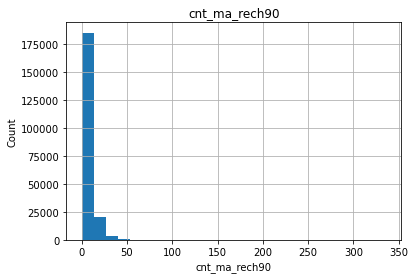

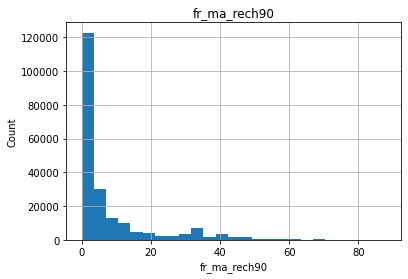

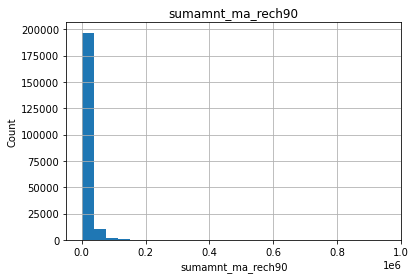

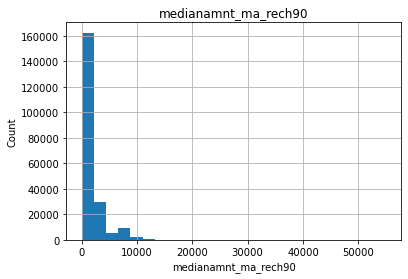

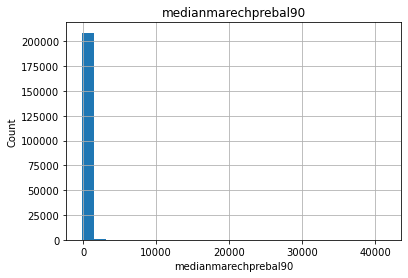

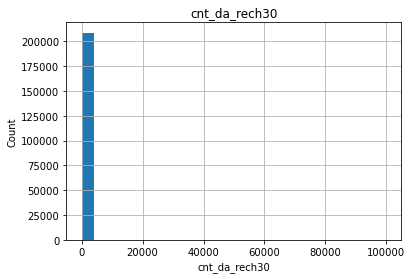

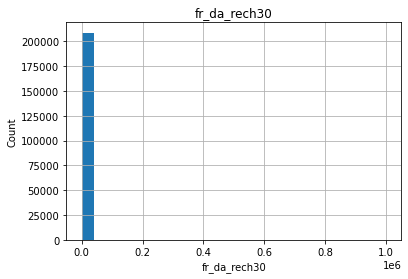

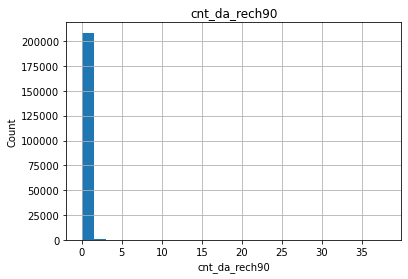

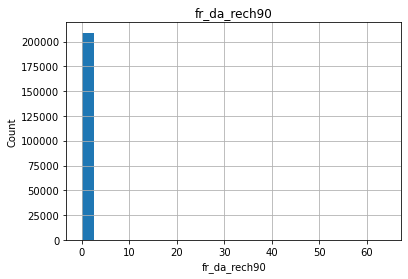

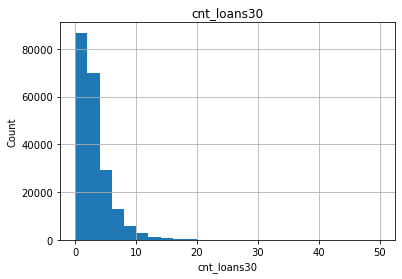

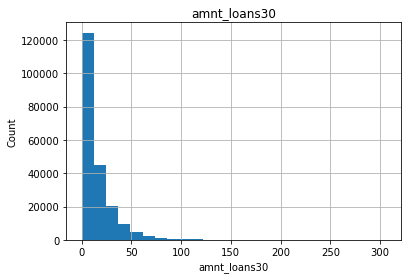

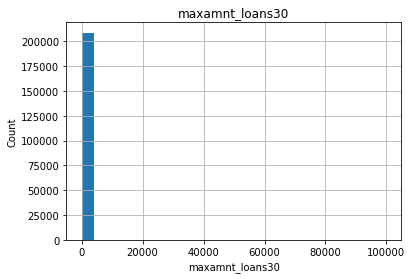

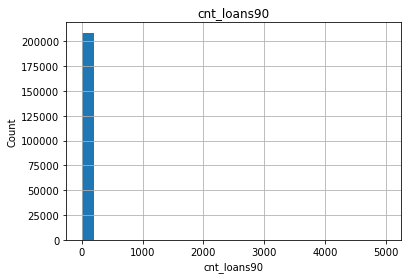

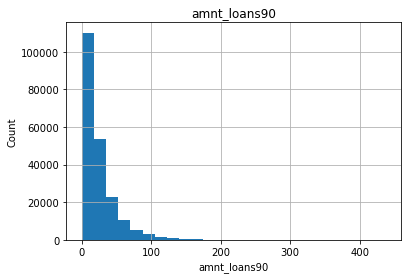

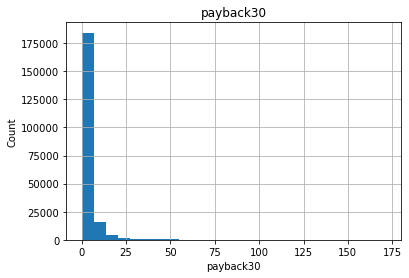

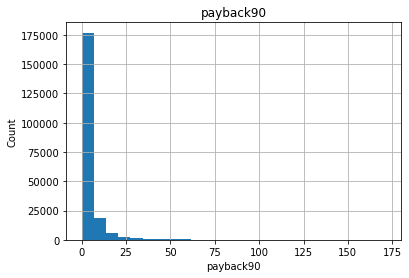

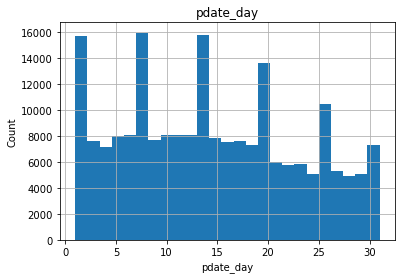

In [10]:
# Visualizing a histplot to bring out a relationship between independent features and the dependent feature
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

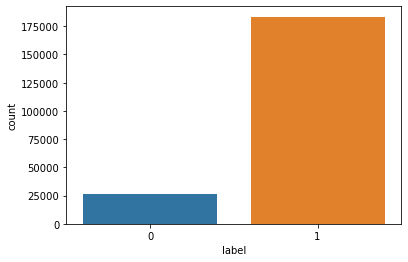

In [11]:
# A countplot is plotted to check the counts of categories in the dependent features
sns.countplot(df["label"])

# The dataset is an imbalanced dataset

# As there are lot of unnecessary features first feature selection is done before feature engineering

In [12]:
#Here the libraries necessary for carrying out a Lasso Regression process is imported to carry out feature selection using Lasso Regressio
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [13]:
# Independent features are assigned to X and dependent features are assigned to Y
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [14]:
X

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [15]:
Y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [16]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [17]:
# Here I check the support (i.e) if the feature is giving any importance to Dependent feature
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True])

In [18]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 34
selected features: 16


In [19]:
# Hereby I  take out the important features out of the dataset
selected_feat

Index(['rental30', 'cnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'medianmarechprebal90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'pdate_month', 'pdate_day'],
      dtype='object')

In [20]:
# As the dataset is splitted into two again it is joined to carry out the rest of the data manipulation process
X=X[selected_feat]

In [21]:
df = X

In [22]:
df["labels"] = Y

C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels
0,220.13,2,1539.0,2,21,7.50,0,2,12,0.0,12,6,0.0,29.000000,7,20,0
1,3691.26,1,5787.0,1,0,61.04,0,1,12,0.0,12,12,0.0,0.000000,8,10,1
2,900.13,1,1539.0,1,0,66.32,0,1,6,0.0,6,6,0.0,0.000000,8,19,1
3,159.42,0,0.0,1,0,2.50,0,2,12,0.0,12,6,0.0,0.000000,6,6,1
4,1098.90,7,2309.0,8,2,35.00,0,7,42,0.0,42,6,0.0,2.333333,6,22,1


In [24]:
# Now the correlation of the new dataset is brought out
df.corr(method = "spearman")

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels
rental30,1.000000,0.426846,0.209881,0.489750,0.134240,0.120683,0.069240,0.320192,0.362412,-0.025824,0.433209,0.263359,-0.053462,0.283562,0.462646,0.094756,0.112923
cnt_ma_rech30,0.426846,1.000000,0.238370,0.918300,0.209086,0.325299,0.016834,0.729125,0.736077,-0.055284,0.720494,0.198635,-0.069391,0.528320,0.201605,0.093399,0.337384
medianamnt_ma_rech30,0.209881,0.238370,1.000000,0.242618,0.350731,0.305726,0.014718,0.156478,0.190311,0.037286,0.207148,0.182653,0.022181,0.114163,0.094186,0.053439,0.229417
cnt_ma_rech90,0.489750,0.918300,0.242618,1.000000,0.251735,0.344767,0.014605,0.686663,0.709667,-0.043013,0.770266,0.255409,-0.074509,0.494390,0.372699,0.065032,0.355376
fr_ma_rech90,0.134240,0.209086,0.350731,0.251735,1.000000,0.210226,0.005156,0.167100,0.172031,0.028078,0.204208,0.043439,0.013201,0.237275,0.116423,0.049512,0.220676
medianmarechprebal90,0.120683,0.325299,0.305726,0.344767,0.210226,1.000000,-0.001479,0.154116,0.169580,0.054764,0.182802,0.084563,0.047684,0.087527,0.092473,0.031297,0.235756
fr_da_rech90,0.069240,0.016834,0.014718,0.014605,0.005156,-0.001479,1.000000,0.020373,0.024929,-0.005799,0.026962,0.031429,-0.002434,0.014784,0.023925,0.061843,-0.007892
cnt_loans30,0.320192,0.729125,0.156478,0.686663,0.167100,0.154116,0.020373,1.000000,0.973287,-0.066486,0.906009,0.179623,-0.088905,0.703461,0.115339,0.093786,0.261115
amnt_loans30,0.362412,0.736077,0.190311,0.709667,0.172031,0.169580,0.024929,0.973287,1.000000,-0.050338,0.932910,0.362720,-0.076989,0.681734,0.187471,0.093704,0.274948
medianamnt_loans30,-0.025824,-0.055284,0.037286,-0.043013,0.028078,0.054764,-0.005799,-0.066486,-0.050338,1.000000,-0.043203,0.051378,0.886063,-0.050214,0.028585,0.001061,0.046397


<AxesSubplot:>

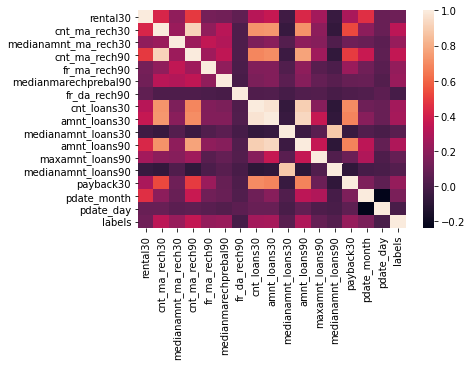

In [25]:
sns.heatmap(df.corr(method = "spearman"))

In [26]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete Variables Count: 5
Continuous feature Count 12


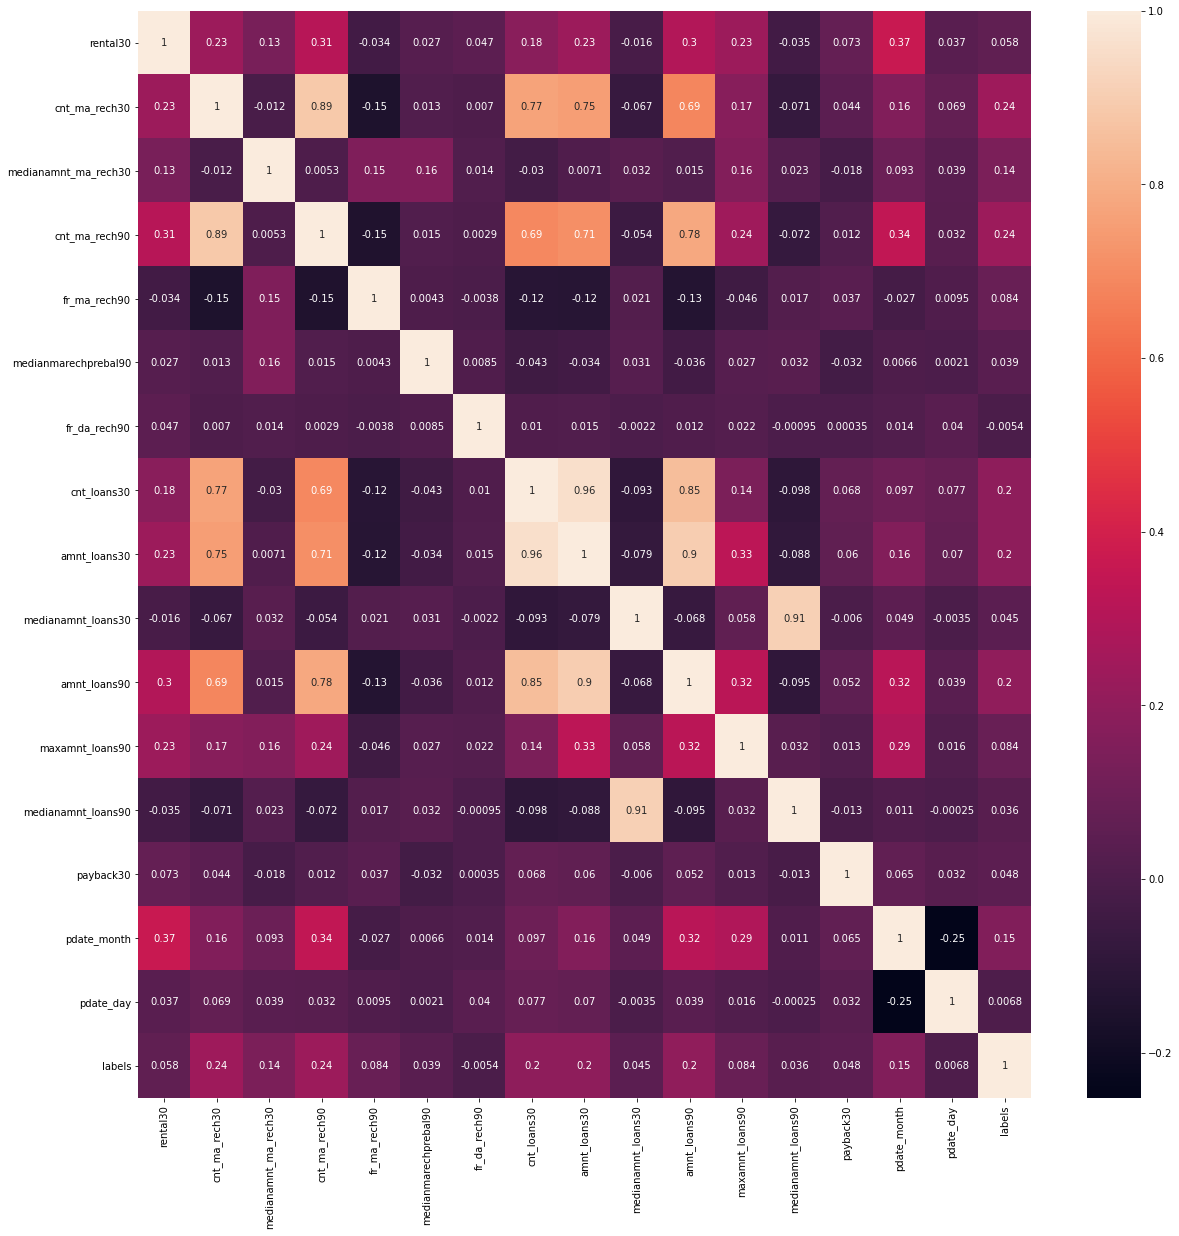

In [27]:
# For better size heatmap is plotted larger
corrmat = df.corr(method = "spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

# Still the data needs to be manipulated to bring out better relationships between the datas

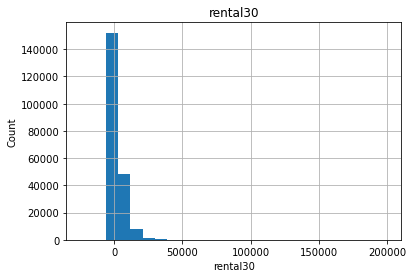

<Figure size 1080x1080 with 0 Axes>

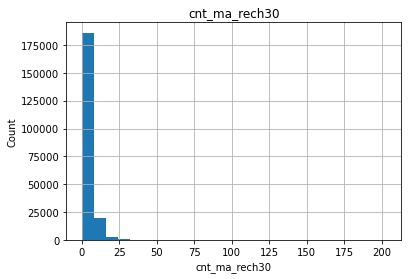

<Figure size 1080x1080 with 0 Axes>

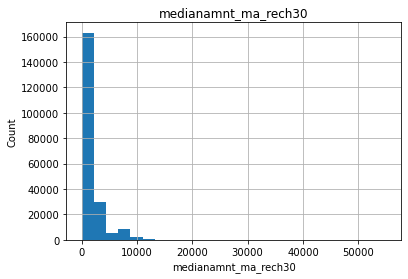

<Figure size 1080x1080 with 0 Axes>

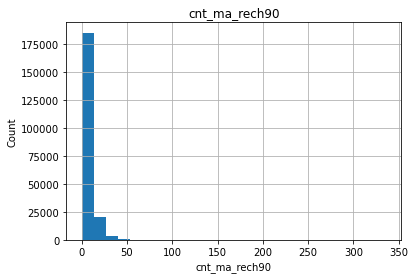

<Figure size 1080x1080 with 0 Axes>

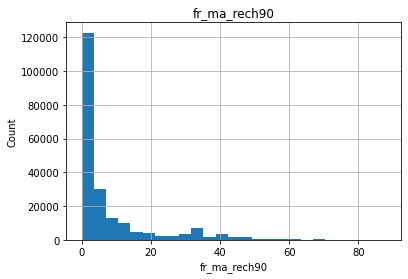

<Figure size 1080x1080 with 0 Axes>

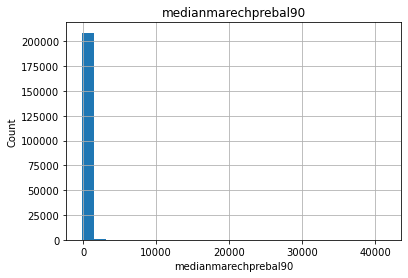

<Figure size 1080x1080 with 0 Axes>

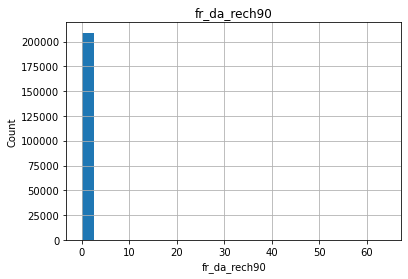

<Figure size 1080x1080 with 0 Axes>

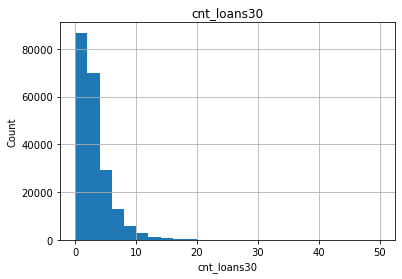

<Figure size 1080x1080 with 0 Axes>

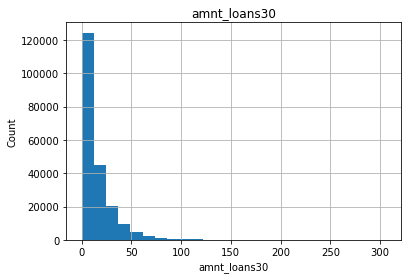

<Figure size 1080x1080 with 0 Axes>

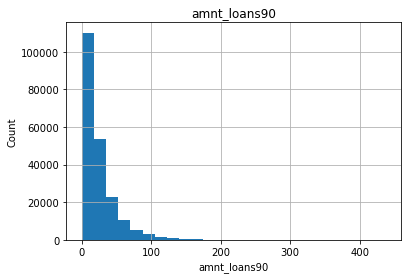

<Figure size 1080x1080 with 0 Axes>

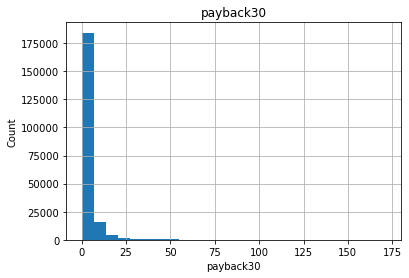

<Figure size 1080x1080 with 0 Axes>

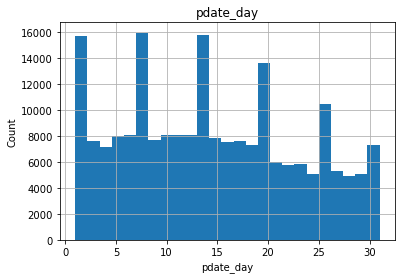

<Figure size 1080x1080 with 0 Axes>

In [28]:
# In selected features continuous features are plotted to see and visualize it to see whether it is skewed or not
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

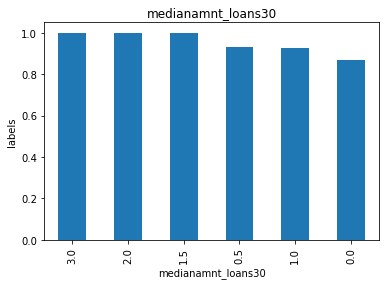

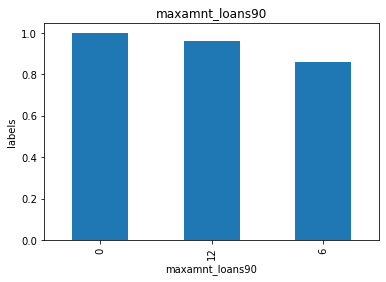

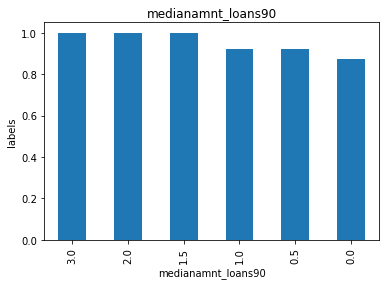

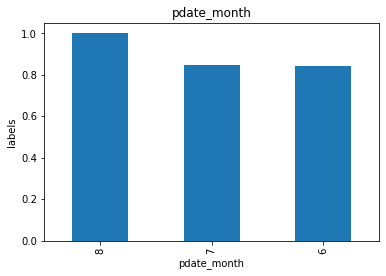

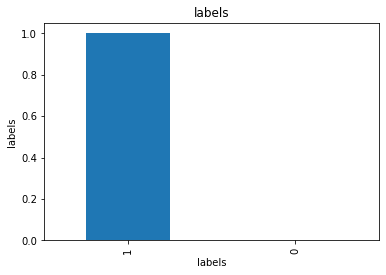

In [29]:
# In selected features discrete features are bar plotted to see ad\nd visualize so that a relation can be brought out
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['labels'].mean().sort_values(ascending=False).plot.bar() #Here the counts are plotted in descending order
    plt.xlabel(feature)
    plt.ylabel("labels")
    plt.title(feature)
    plt.show()

In [30]:
df["pdate_month"].unique() # Seeing the unique values of pdate_month

array([7, 8, 6], dtype=int64)

In [31]:
# As per the graph as 8 had a great numbers than others there is some rank been provided to capture the importance out of it
df.loc[ df["pdate_month"] == 8, 'pdate_monthimp']= 1
df.loc[ df["pdate_month"] < 8, 'pdate_monthimp']= 2
# This code does a job in which when the data condition satifies according to it rank is assigned

C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

# Similar kinda process is taken out for all the discrete features

In [32]:
df.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels,pdate_monthimp
0,220.13,2,1539.0,2,21,7.50,0,2,12,0.0,12,6,0.0,29.000000,7,20,0,2.0
1,3691.26,1,5787.0,1,0,61.04,0,1,12,0.0,12,12,0.0,0.000000,8,10,1,1.0
2,900.13,1,1539.0,1,0,66.32,0,1,6,0.0,6,6,0.0,0.000000,8,19,1,1.0
3,159.42,0,0.0,1,0,2.50,0,2,12,0.0,12,6,0.0,0.000000,6,6,1,2.0
4,1098.90,7,2309.0,8,2,35.00,0,7,42,0.0,42,6,0.0,2.333333,6,22,1,2.0


In [33]:

df.loc[ df["medianamnt_loans90"] >= 1.5, 'medianamnt_loans90imp']= 1
df.loc[ (df["medianamnt_loans90"] <1.5) & (df["medianamnt_loans90"]> 0), 'medianamnt_loans90imp']= 2
df.loc[ df["medianamnt_loans90"] == 0, 'medianamnt_loans90imp']= 3


C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [34]:
df.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels,pdate_monthimp,medianamnt_loans90imp
0,220.13,2,1539.0,2,21,7.50,0,2,12,0.0,12,6,0.0,29.000000,7,20,0,2.0,3.0
1,3691.26,1,5787.0,1,0,61.04,0,1,12,0.0,12,12,0.0,0.000000,8,10,1,1.0,3.0
2,900.13,1,1539.0,1,0,66.32,0,1,6,0.0,6,6,0.0,0.000000,8,19,1,1.0,3.0
3,159.42,0,0.0,1,0,2.50,0,2,12,0.0,12,6,0.0,0.000000,6,6,1,2.0,3.0
4,1098.90,7,2309.0,8,2,35.00,0,7,42,0.0,42,6,0.0,2.333333,6,22,1,2.0,3.0


In [35]:
df["medianamnt_loans90imp"].mode()

0    3.0
dtype: float64

In [36]:
df.loc[ df["medianamnt_loans30"] >= 1.5, 'medianamnt_loans30imp']= 1
df.loc[ (df["medianamnt_loans30"] <1.5) & (df["medianamnt_loans30"]> 0), 'medianamnt_loans30imp']= 2
df.loc[ df["medianamnt_loans30"] == 0, 'medianamnt_loans30imp']= 3

C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [37]:
df.loc[ df["maxamnt_loans90"] == 0, 'maxamnt_loans90']= 1
df.loc[ df["maxamnt_loans90"] == 12, 'maxamnt_loans90']= 2
df.loc[ df["maxamnt_loans90"] == 6, 'maxamnt_loans90']= 3

C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Now its time to handle the outliers in the data 

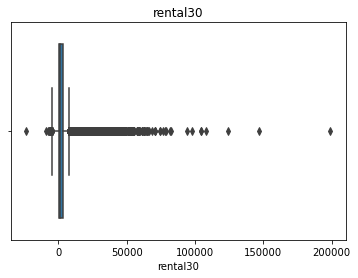

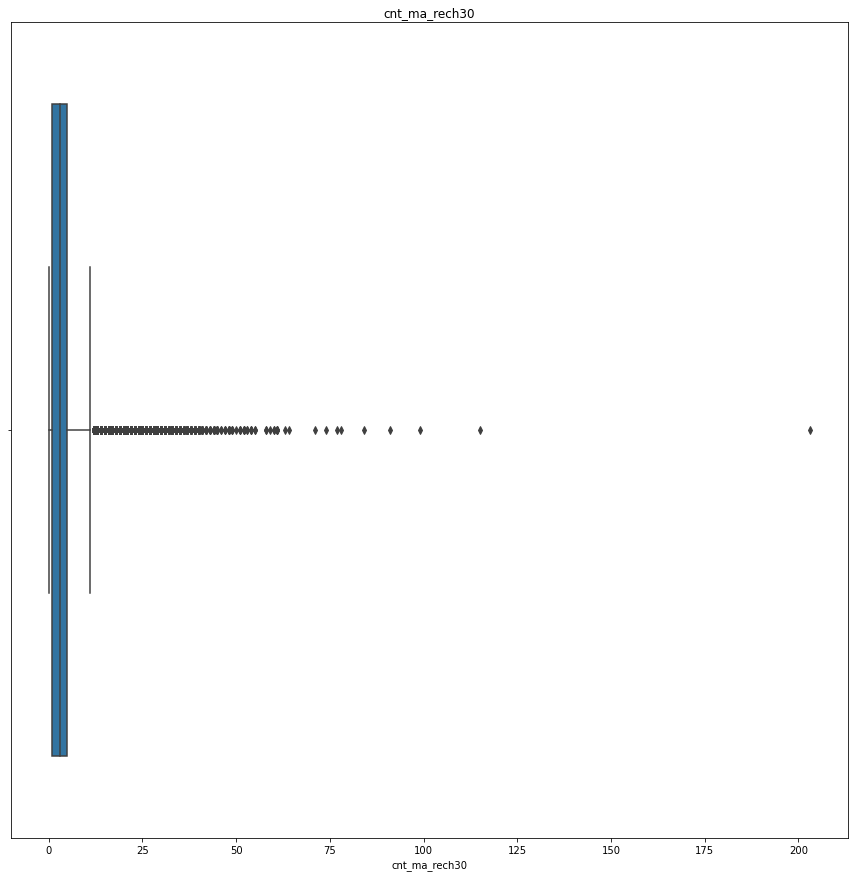

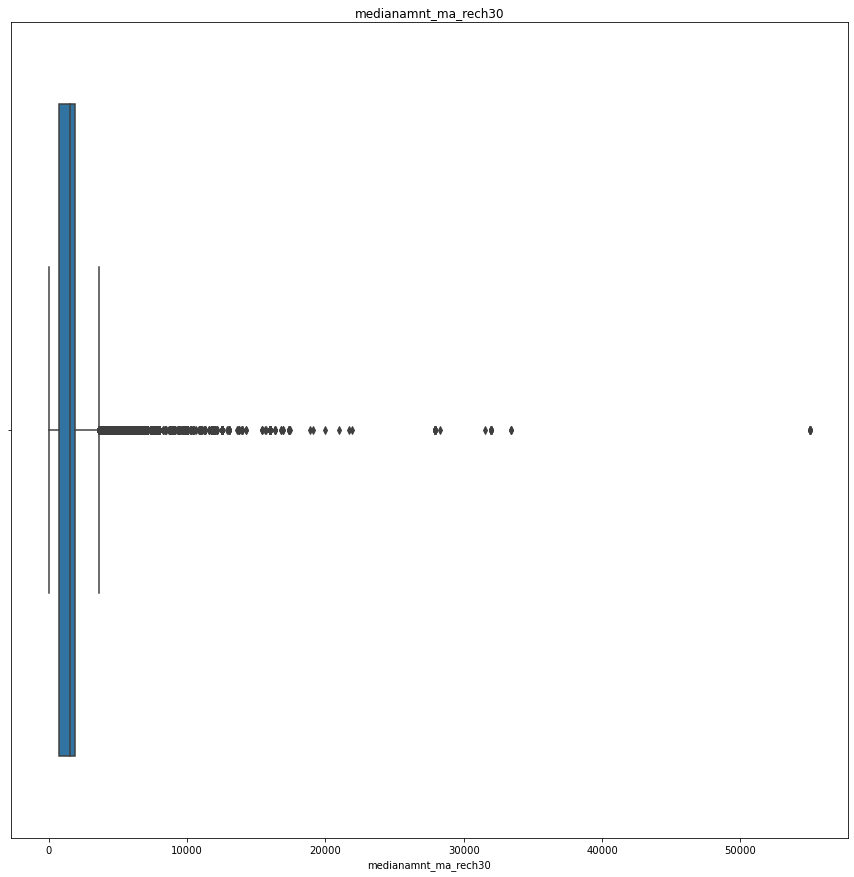

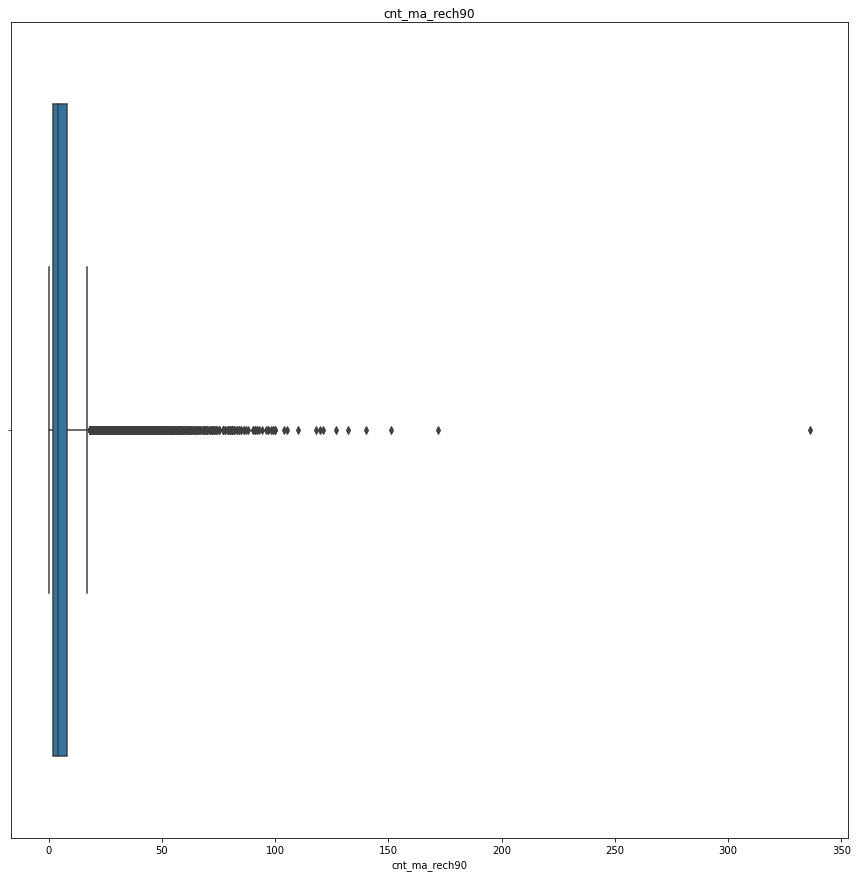

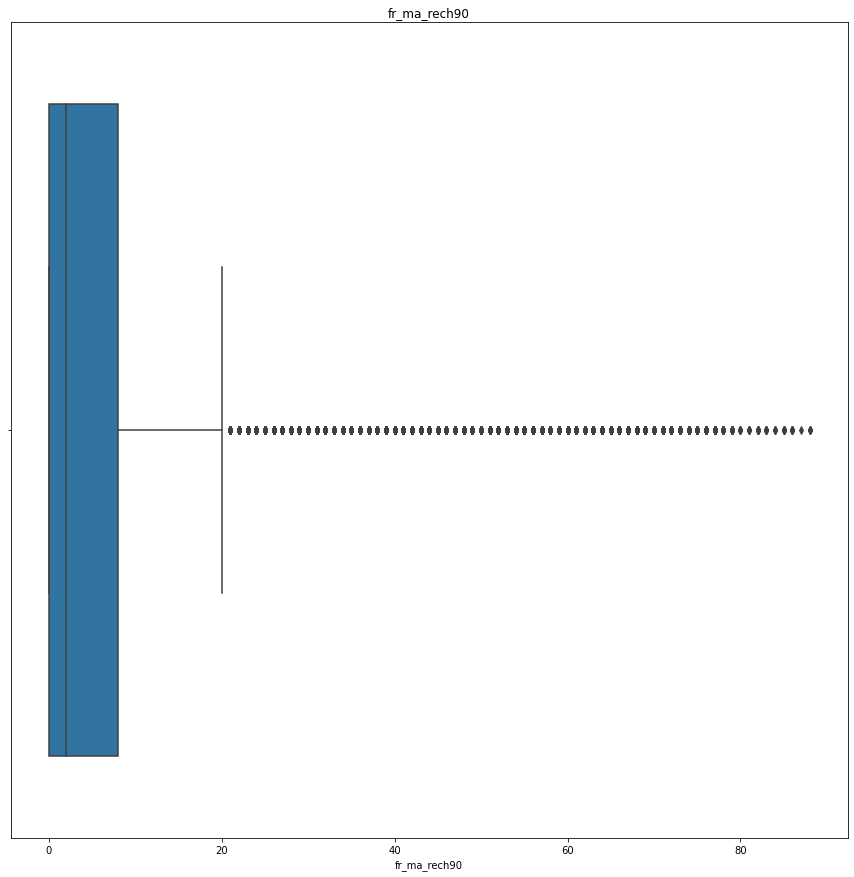

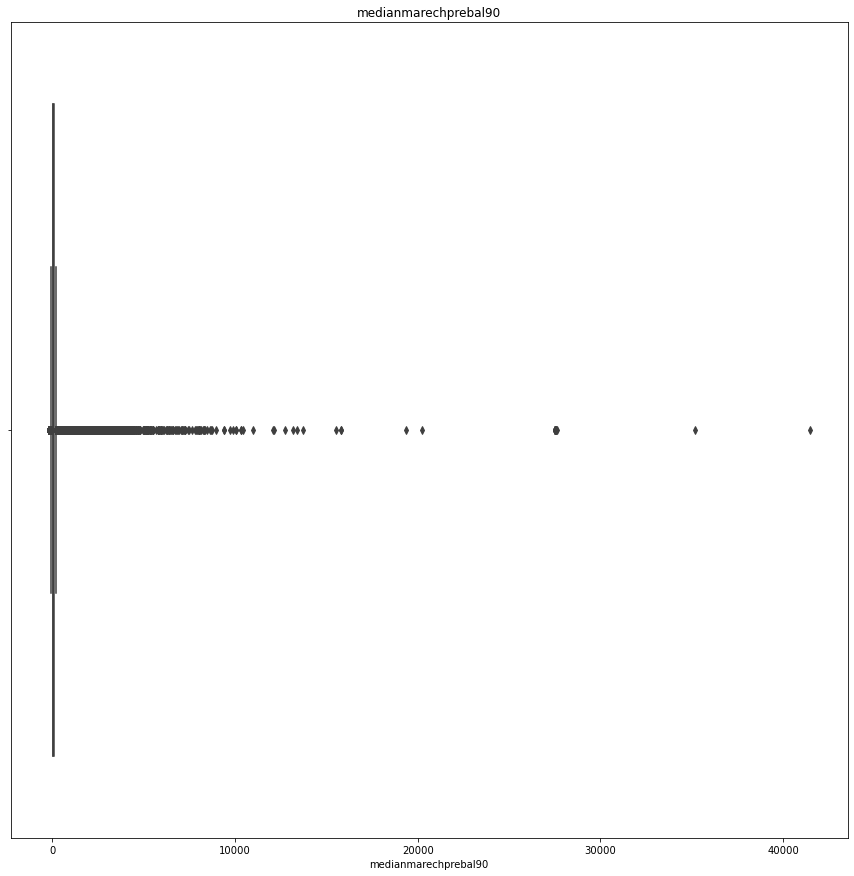

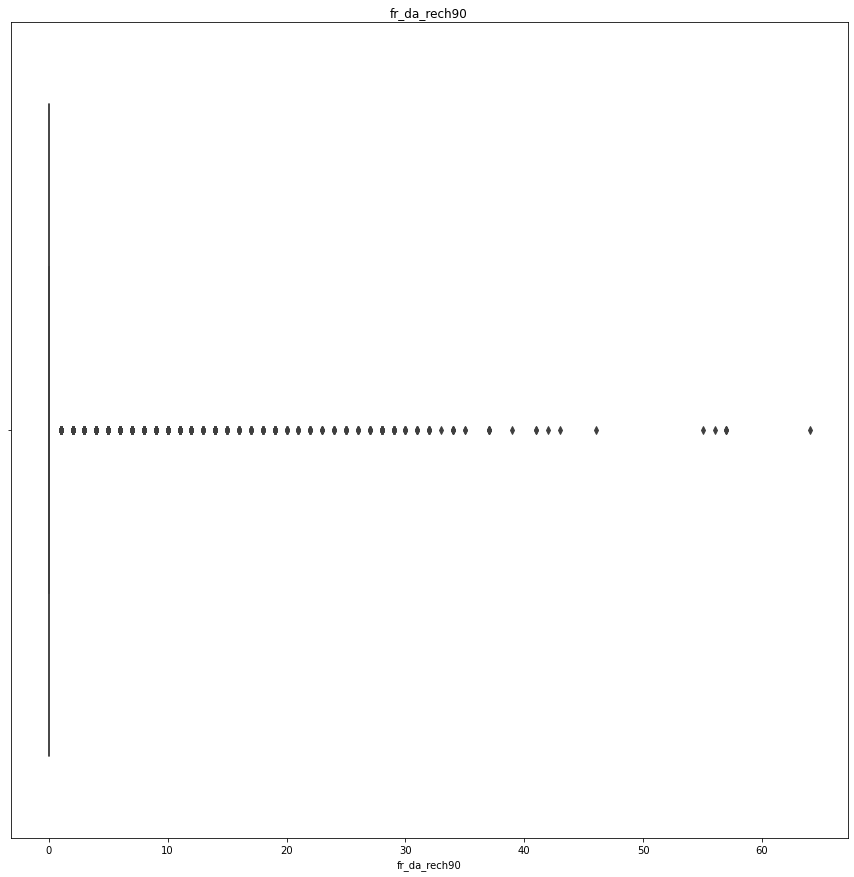

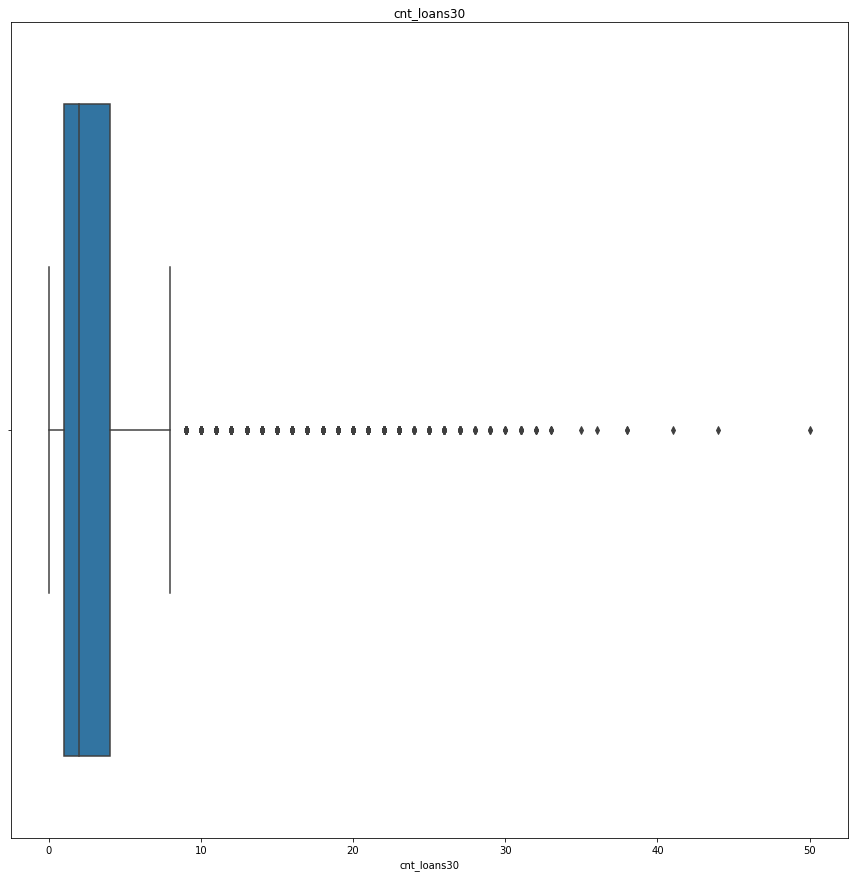

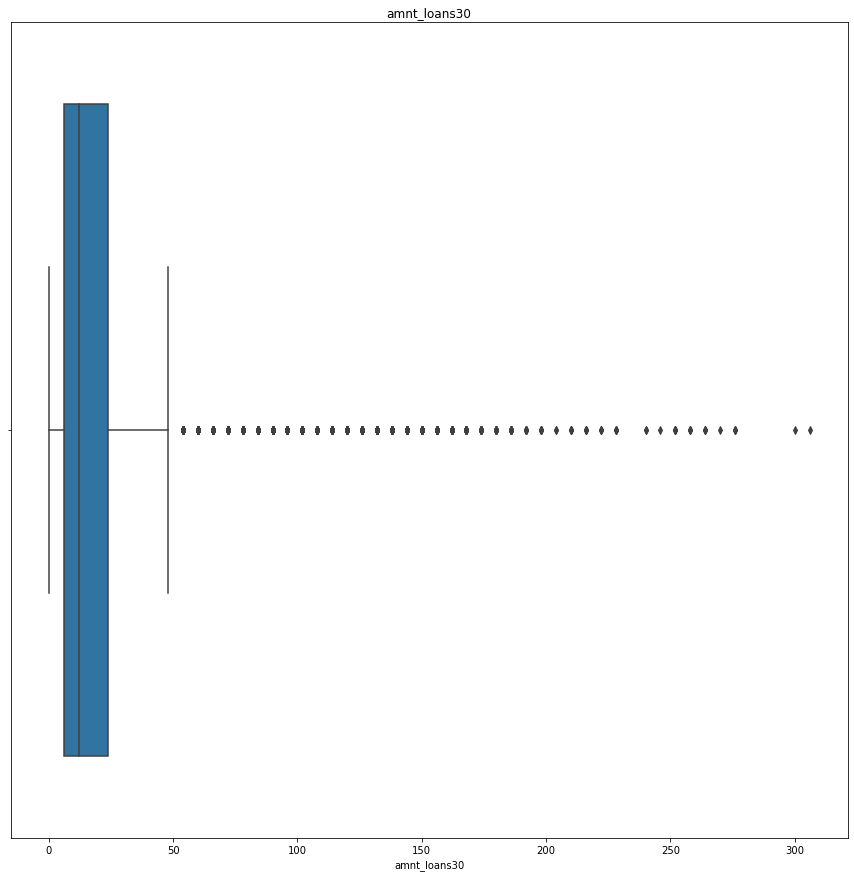

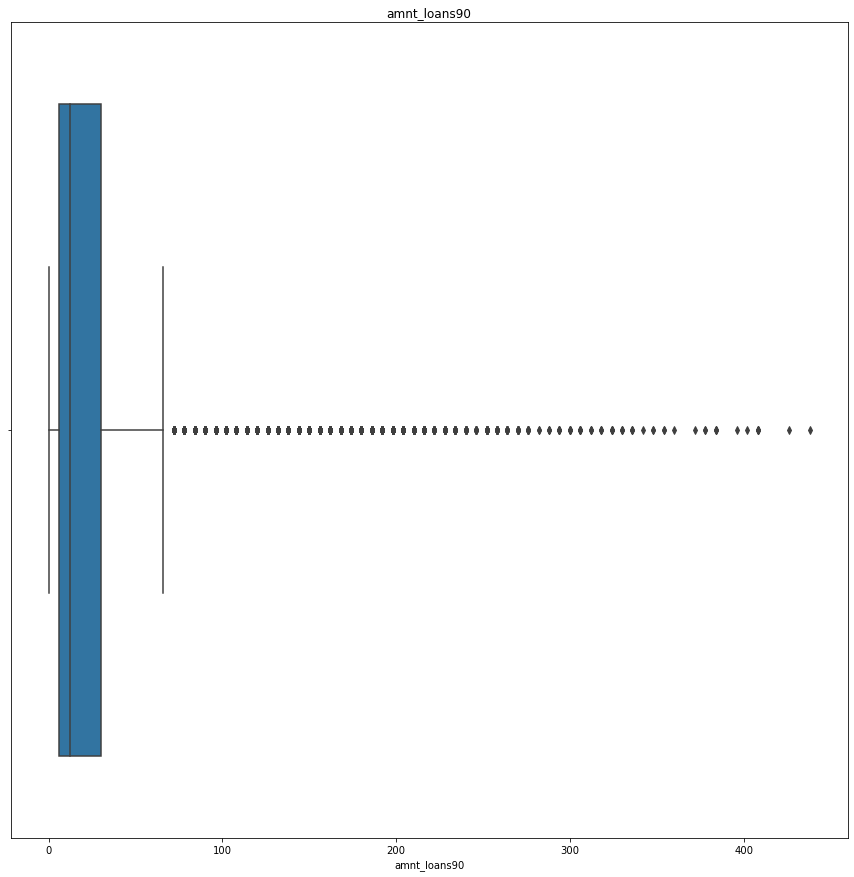

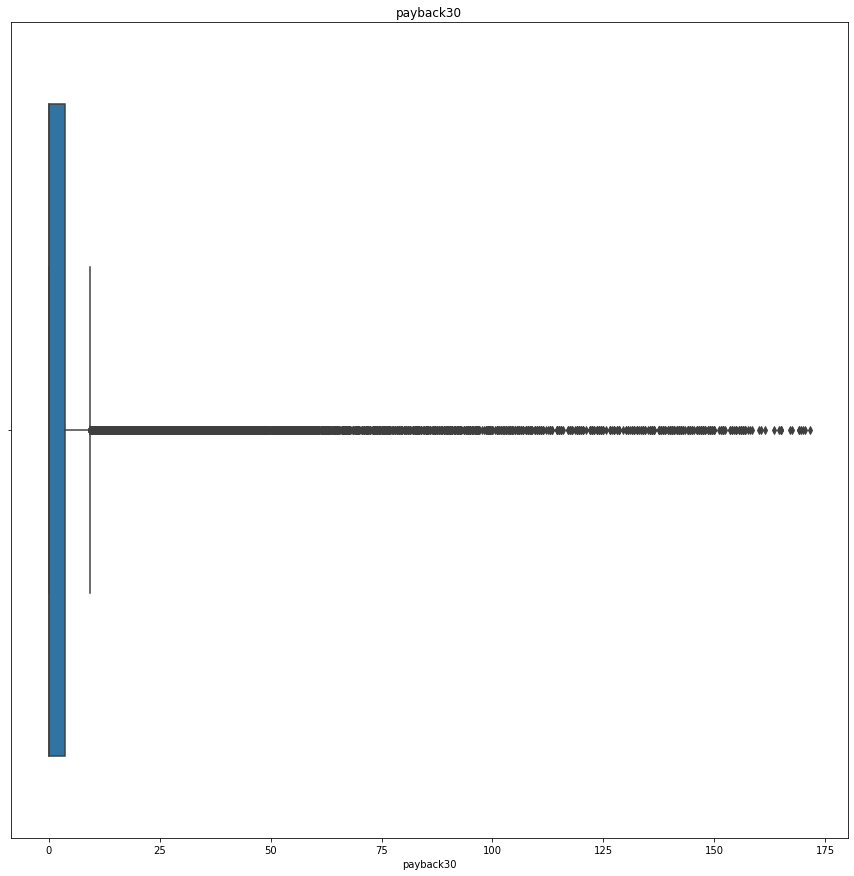

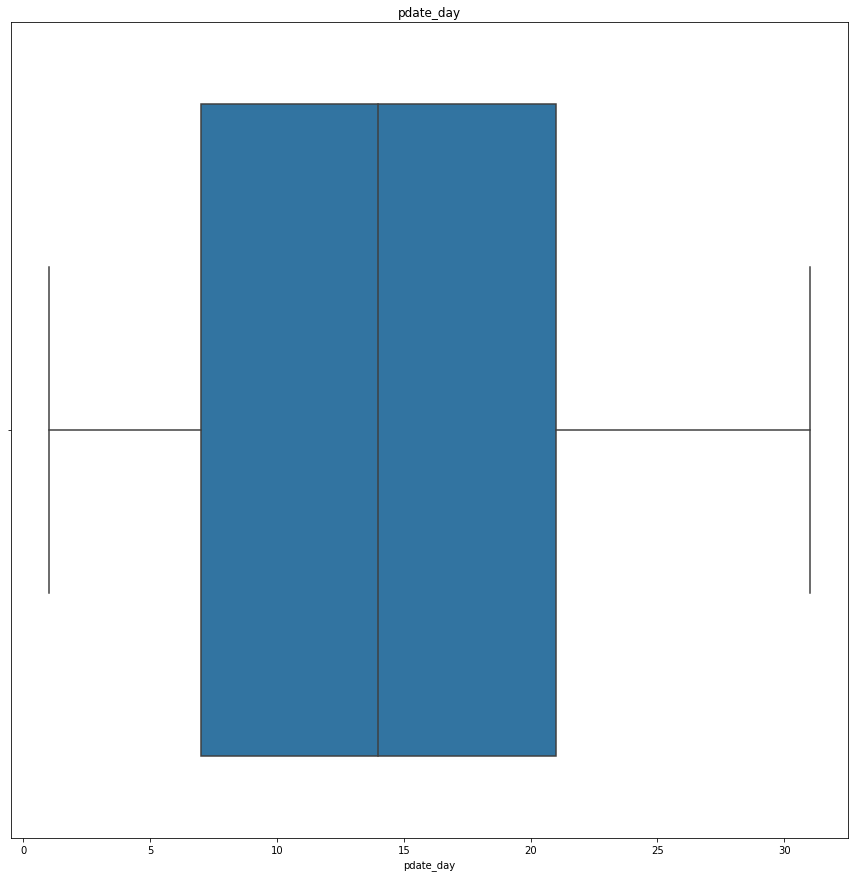

<Figure size 1080x1080 with 0 Axes>

In [38]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# Here there are very large number of outliers to manage

In [39]:
# Data is saved into a csv for reusability
df.to_csv("samplle992020.csv", index = False)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df1 = pd.read_csv("samplle992020.csv")

In [42]:
df1

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels,pdate_monthimp,medianamnt_loans90imp,medianamnt_loans30imp
0,220.13,2,1539.0,2,21,7.50,0,2,12,0.0,12,3,0.0,29.000000,7,20,0,2.0,3.0,3.0
1,3691.26,1,5787.0,1,0,61.04,0,1,12,0.0,12,2,0.0,0.000000,8,10,1,1.0,3.0,3.0
2,900.13,1,1539.0,1,0,66.32,0,1,6,0.0,6,3,0.0,0.000000,8,19,1,1.0,3.0,3.0
3,159.42,0,0.0,1,0,2.50,0,2,12,0.0,12,3,0.0,0.000000,6,6,1,2.0,3.0,3.0
4,1098.90,7,2309.0,8,2,35.00,0,7,42,0.0,42,3,0.0,2.333333,6,22,1,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1089.19,3,3178.0,3,2,91.81,0,2,12,0.0,12,3,0.0,1.000000,6,17,1,2.0,3.0,3.0
209589,1728.36,4,773.0,6,2,111.80,0,3,18,0.0,18,3,0.0,1.000000,6,12,1,2.0,3.0,3.0
209590,5861.83,5,1539.0,11,5,47.13,0,4,42,0.0,54,2,0.0,4.000000,7,29,1,2.0,3.0,3.0
209591,411.83,5,773.0,6,4,100.00,0,2,18,0.0,24,2,0.0,0.000000,7,25,1,2.0,3.0,3.0


In [43]:
# Here all the dtypes of the independent features are made to be float
df1=df1.astype(float)

In [44]:
df1.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels,pdate_monthimp,medianamnt_loans90imp,medianamnt_loans30imp
0,220.13,2.0,1539.0,2.0,21.0,7.50,0.0,2.0,12.0,0.0,12.0,3.0,0.0,29.000000,7.0,20.0,0.0,2.0,3.0,3.0
1,3691.26,1.0,5787.0,1.0,0.0,61.04,0.0,1.0,12.0,0.0,12.0,2.0,0.0,0.000000,8.0,10.0,1.0,1.0,3.0,3.0
2,900.13,1.0,1539.0,1.0,0.0,66.32,0.0,1.0,6.0,0.0,6.0,3.0,0.0,0.000000,8.0,19.0,1.0,1.0,3.0,3.0
3,159.42,0.0,0.0,1.0,0.0,2.50,0.0,2.0,12.0,0.0,12.0,3.0,0.0,0.000000,6.0,6.0,1.0,2.0,3.0,3.0
4,1098.90,7.0,2309.0,8.0,2.0,35.00,0.0,7.0,42.0,0.0,42.0,3.0,0.0,2.333333,6.0,22.0,1.0,2.0,3.0,3.0


In [45]:
# As there are only two categories it is made to int
df1["labels"] = df1["labels"].astype(int)

In [46]:
df1.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,labels,pdate_monthimp,medianamnt_loans90imp,medianamnt_loans30imp
0,220.13,2.0,1539.0,2.0,21.0,7.50,0.0,2.0,12.0,0.0,12.0,3.0,0.0,29.000000,7.0,20.0,0,2.0,3.0,3.0
1,3691.26,1.0,5787.0,1.0,0.0,61.04,0.0,1.0,12.0,0.0,12.0,2.0,0.0,0.000000,8.0,10.0,1,1.0,3.0,3.0
2,900.13,1.0,1539.0,1.0,0.0,66.32,0.0,1.0,6.0,0.0,6.0,3.0,0.0,0.000000,8.0,19.0,1,1.0,3.0,3.0
3,159.42,0.0,0.0,1.0,0.0,2.50,0.0,2.0,12.0,0.0,12.0,3.0,0.0,0.000000,6.0,6.0,1,2.0,3.0,3.0
4,1098.90,7.0,2309.0,8.0,2.0,35.00,0.0,7.0,42.0,0.0,42.0,3.0,0.0,2.333333,6.0,22.0,1,2.0,3.0,3.0


# Features to be handled for outliers
'rental30', 'cnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'medianmarechprebal90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30',  'amnt_loans90', 
        'payback30', 'pdate_day'

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

AS the Bagging and Boosting models are tree based and not so affected by outliers it is managed upto 2nd standard deviation

In [47]:
IQR=df1.rental30.quantile(0.75)-df1.rental30.quantile(0.25)
lower_bridge=df1.rental30.quantile(0.25)-(IQR*2)
upper_bridge=df1.rental30.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-5872.62
9509.98


(None, None)

In [48]:
df1.loc[df1['rental30']>=9509.68,'rental30']=9509.0
df1.loc[df1['rental30']<=0,'rental30']=0

In [49]:
IQR=df1.cnt_ma_rech30.quantile(0.75)-df1.cnt_ma_rech30.quantile(0.25)
lower_bridge=df1.cnt_ma_rech30.quantile(0.25)-(IQR*2)
upper_bridge=df1.cnt_ma_rech30.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-7.0
13.0


(None, None)

In [50]:
df1.loc[df1['cnt_ma_rech30']>=13.0,'cnt_ma_rech30']=13.0

In [51]:
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df1[feature].unique())<25]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

In [52]:
 continuous_feature

['rental30',
 'medianamnt_ma_rech30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'medianmarechprebal90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'amnt_loans90',
 'payback30',
 'pdate_day']

In [53]:
IQR=df1.fr_ma_rech90.quantile(0.75)-df1.fr_ma_rech90.quantile(0.25)
lower_bridge=df1.fr_ma_rech90.quantile(0.25)-(IQR*2)
upper_bridge=df1.fr_ma_rech90.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-16.0
24.0


(None, None)

In [54]:
df1.loc[df1['fr_ma_rech90']>=24.0,'fr_ma_rech90']=24.0

In [55]:
IQR=df1.medianamnt_ma_rech30.quantile(0.75)-df1.medianamnt_ma_rech30.quantile(0.25)
lower_bridge=df1.medianamnt_ma_rech30.quantile(0.25)-(IQR*2)
upper_bridge=df1.medianamnt_ma_rech30.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-1538.0
4232.0


(None, None)

In [56]:
df1.loc[df1['medianamnt_ma_rech30']>=4232.0,'medianamnt_ma_rech30']=4232.0

In [57]:
IQR=df1.medianmarechprebal90.quantile(0.75)-df1.medianmarechprebal90.quantile(0.25)
lower_bridge=df1.medianmarechprebal90.quantile(0.25)-(IQR*2)
upper_bridge=df1.medianmarechprebal90.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-114.82000000000002
208.73000000000002


(None, None)

In [58]:
df1.loc[df1['medianmarechprebal90']>=207.33,'medianmarechprebal90']=207.0
df1.loc[df1['medianmarechprebal90']<=0,'medianmarechprebal90']=0

In [59]:
IQR=df1.cnt_loans30.quantile(0.75)-df1.cnt_loans30.quantile(0.25)
lower_bridge=df1.cnt_loans30.quantile(0.25)-(IQR*2)
upper_bridge=df1.cnt_loans30.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-5.0
10.0


(None, None)

In [60]:
df1.loc[df1['cnt_loans30']>=10.0,'cnt_loans30']=10.0

In [61]:
IQR=df1.amnt_loans30.quantile(0.75)-df1.amnt_loans30.quantile(0.25)
lower_bridge=df1.amnt_loans30.quantile(0.25)-(IQR*2)
upper_bridge=df1.amnt_loans30.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-30.0
60.0


(None, None)

In [62]:
df1.loc[df1['amnt_loans30']>=60.0,'amnt_loans30']=60.0

In [63]:
IQR=df1.amnt_loans90.quantile(0.75)-df1.amnt_loans90.quantile(0.25)
lower_bridge=df1.amnt_loans90.quantile(0.25)-(IQR*2)
upper_bridge=df1.amnt_loans90.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-42.0
78.0


(None, None)

In [64]:
df1.loc[df1['amnt_loans90']>=78.0,'amnt_loans90']=78.0

In [65]:
IQR=df1.payback30.quantile(0.75)-df1.payback30.quantile(0.25)
lower_bridge=df1.payback30.quantile(0.25)-(IQR*2)
upper_bridge=df1.payback30.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-7.5
11.25


(None, None)

In [66]:
df1.loc[df1['payback30']>=11.25,'payback30']=11.0

In [67]:
df1.loc[df1['pdate_day']>=31.0,'pdate_day']=31.0

In [68]:
IQR=df1.cnt_ma_rech90.quantile(0.75)-df1.cnt_ma_rech90.quantile(0.25)
lower_bridge=df1.cnt_ma_rech90.quantile(0.25)-(IQR*2)
upper_bridge=df1.cnt_ma_rech90.quantile(0.75)+(IQR*2)
print(lower_bridge), print(upper_bridge)

-10.0
20.0


(None, None)

In [69]:
df1.loc[df1['cnt_ma_rech90']>=30.0,'cnt_ma_rech90']=30.0

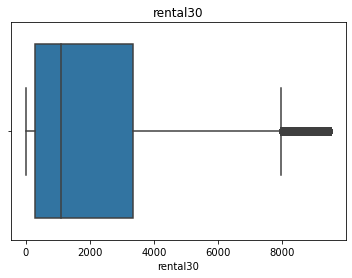

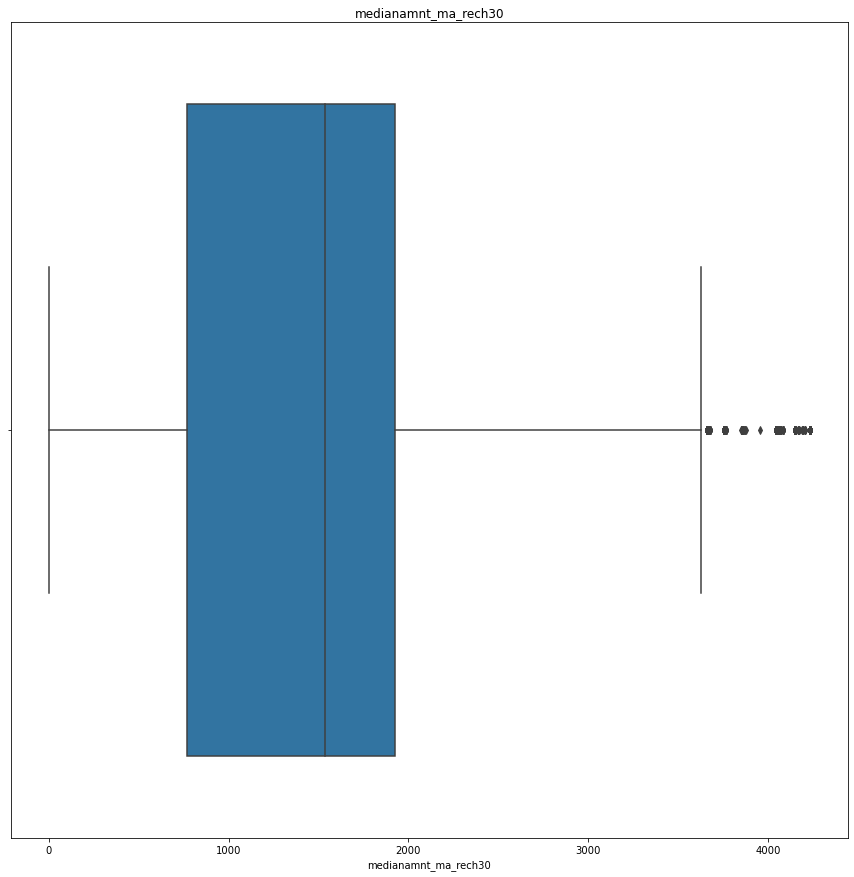

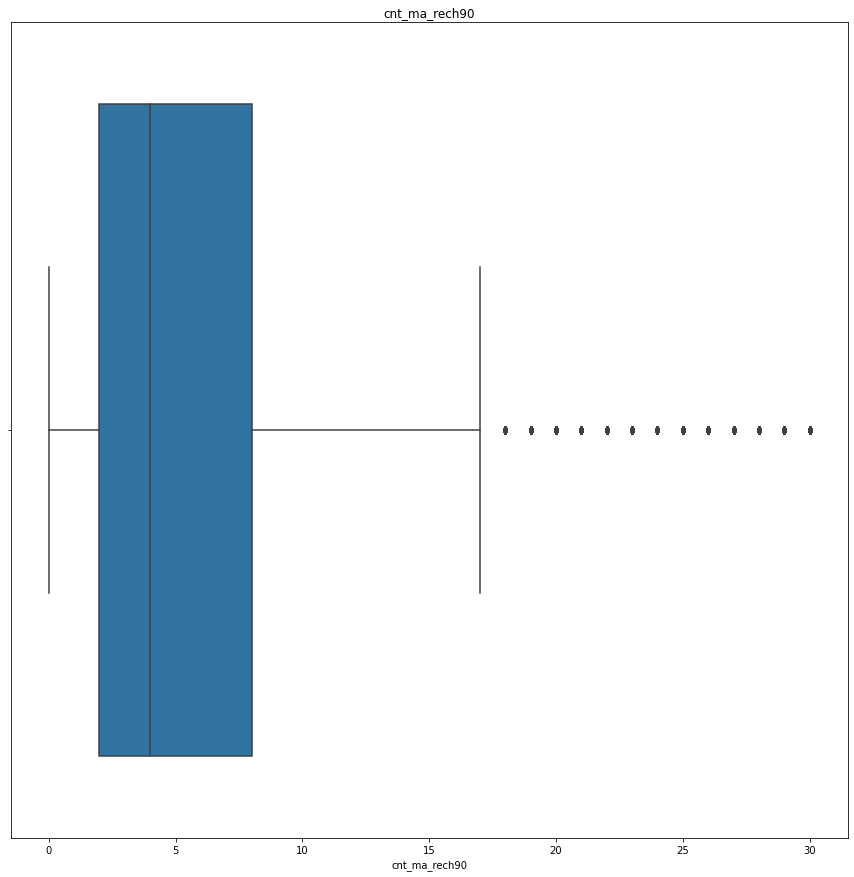

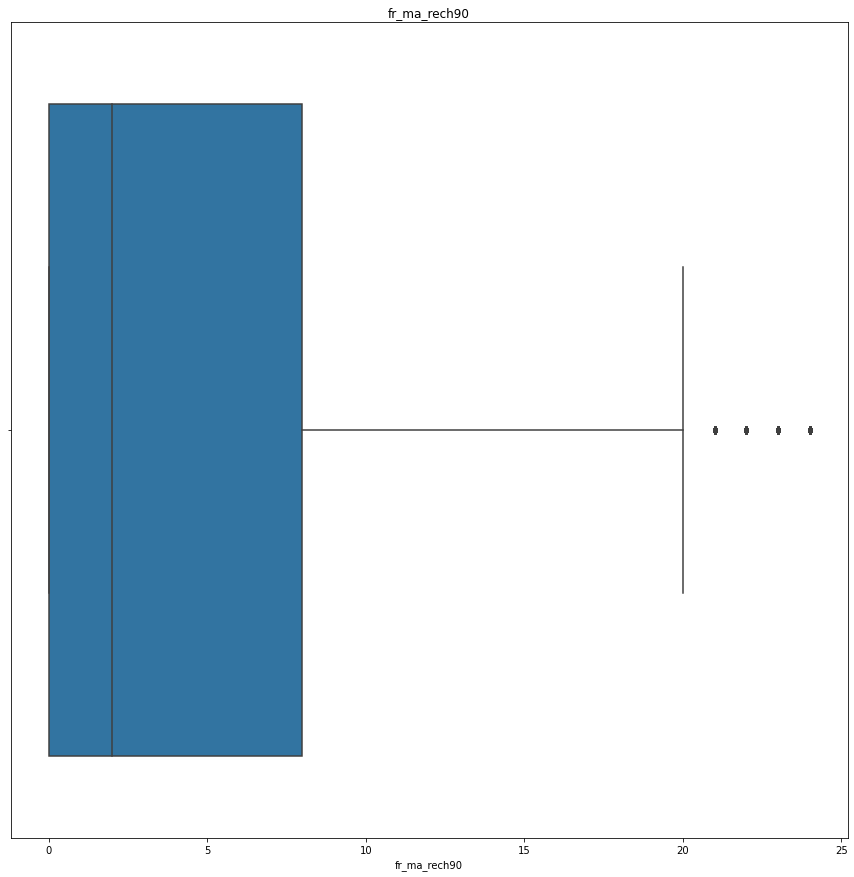

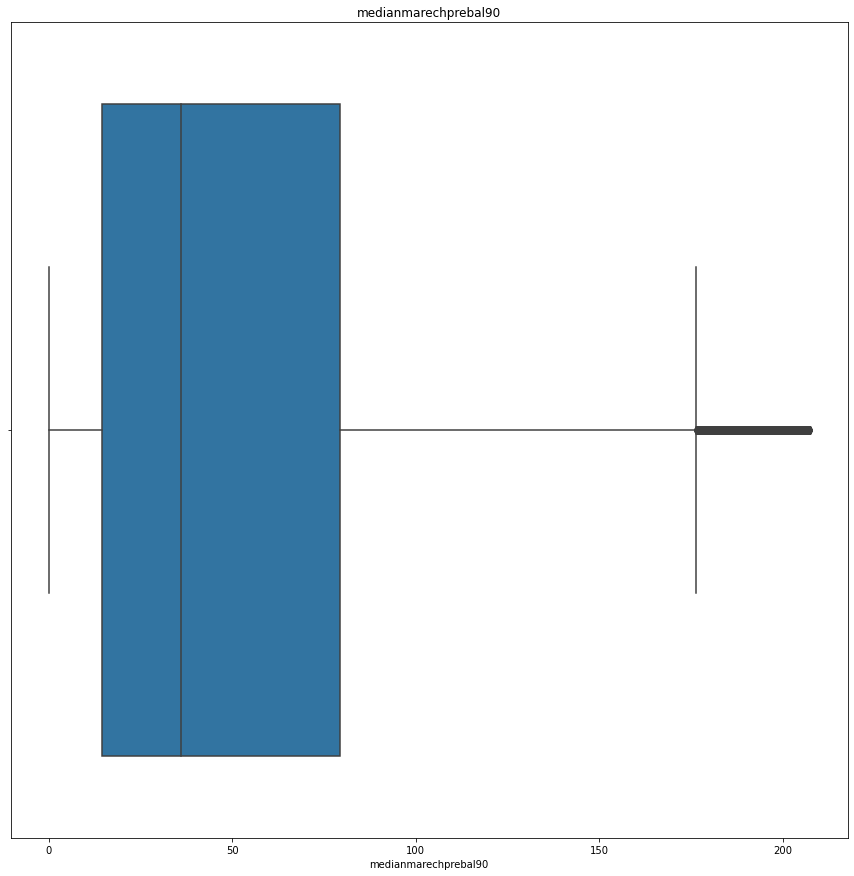

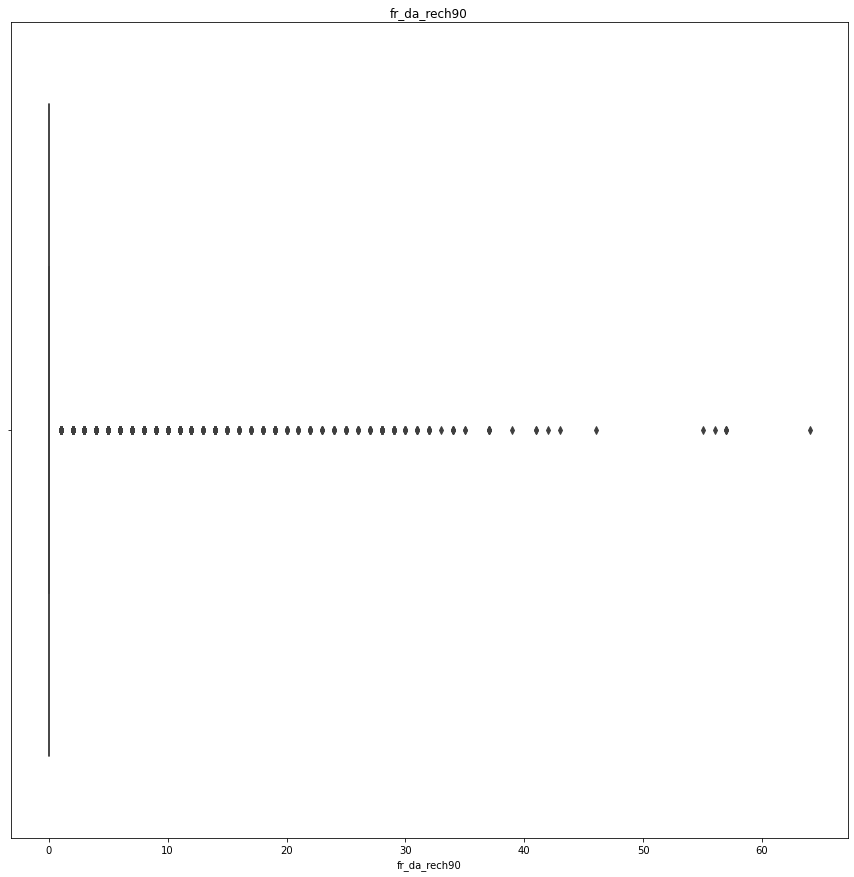

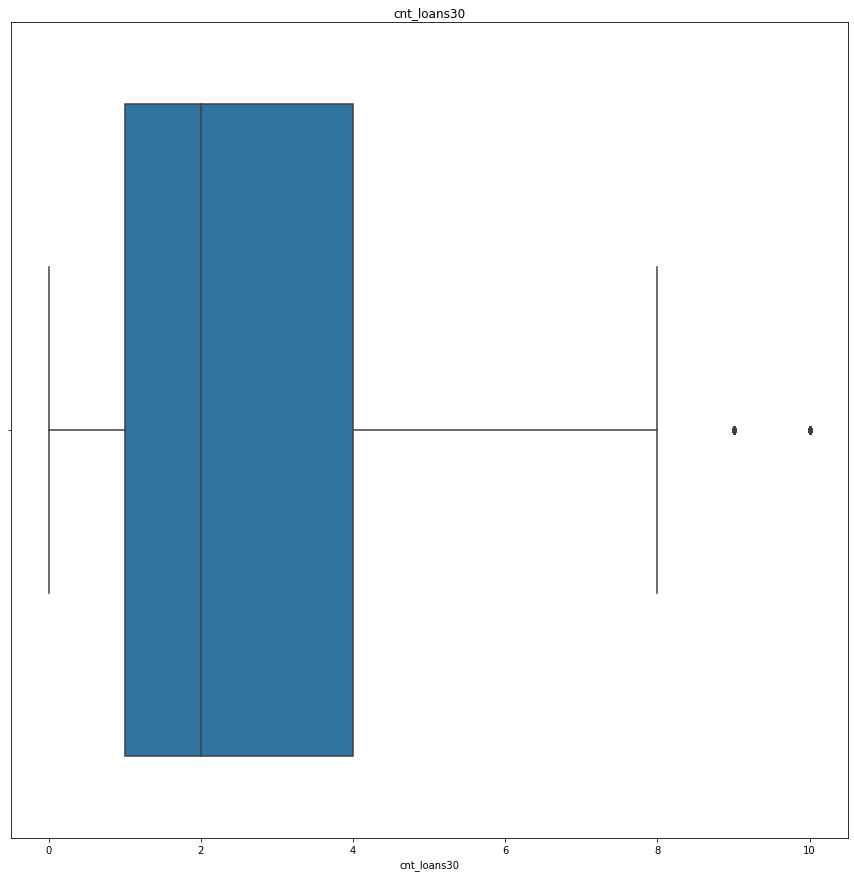

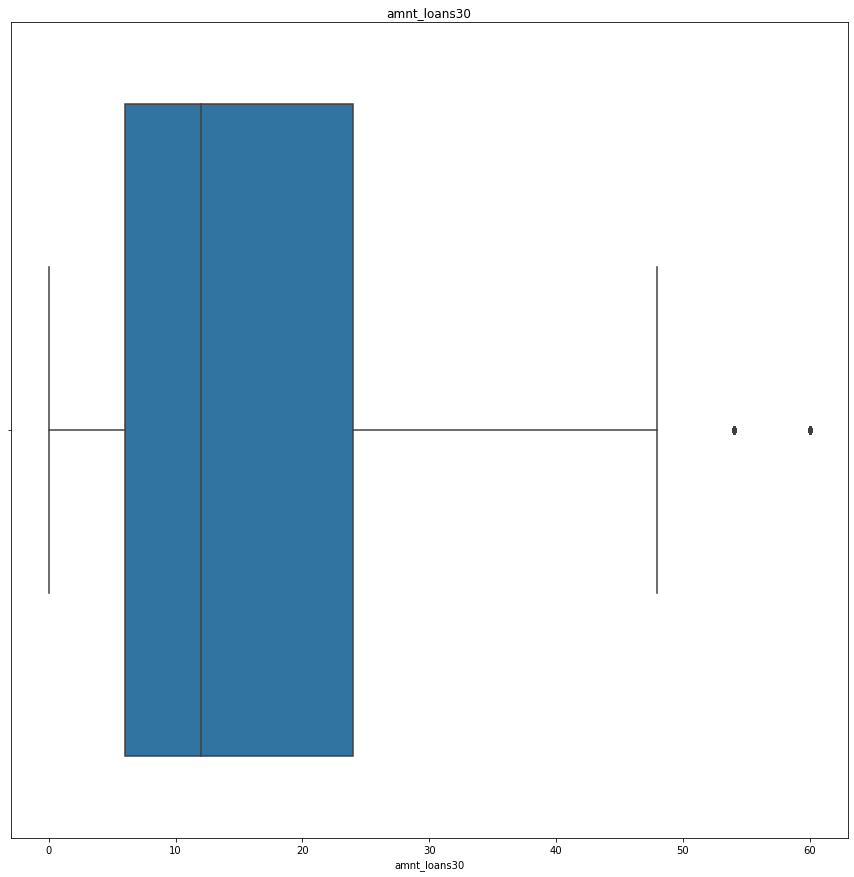

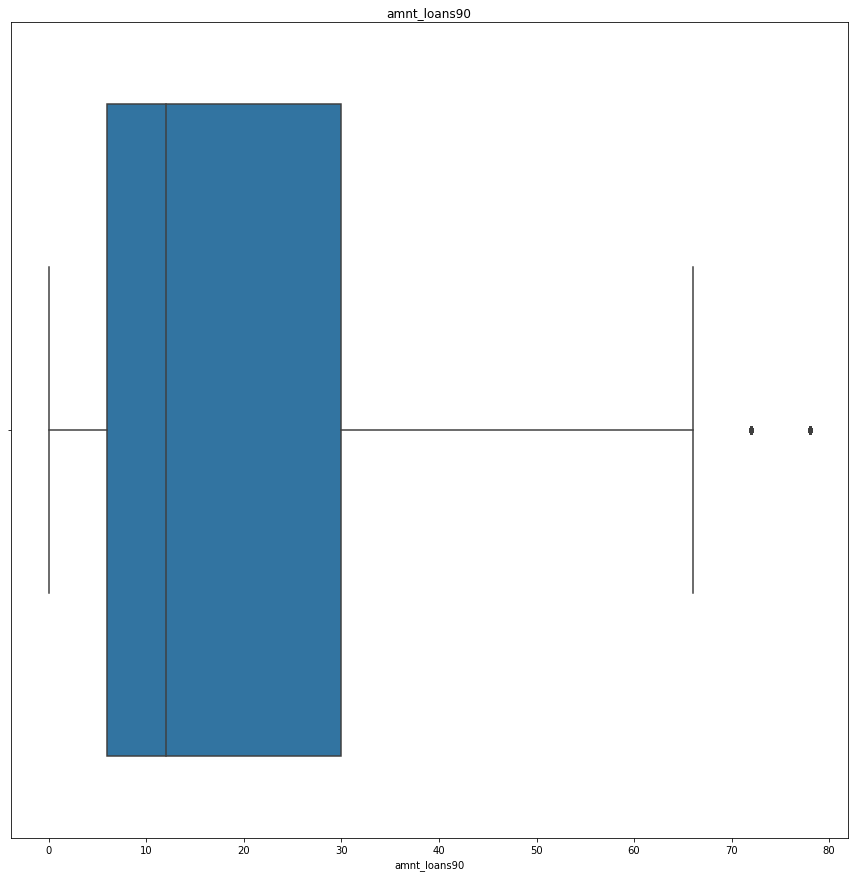

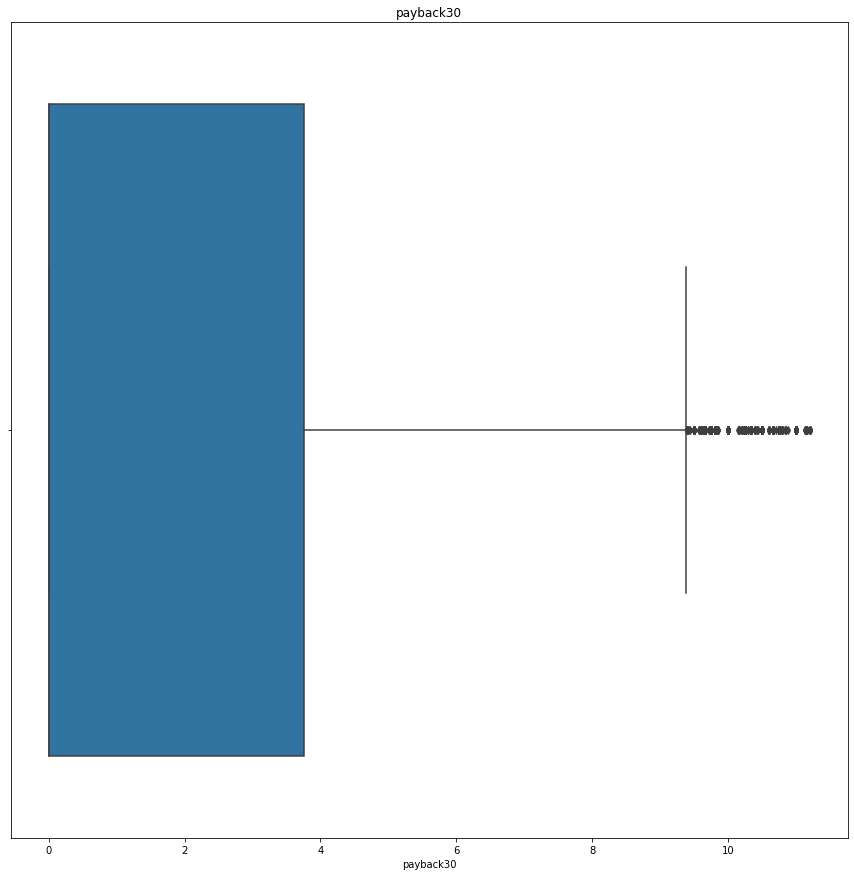

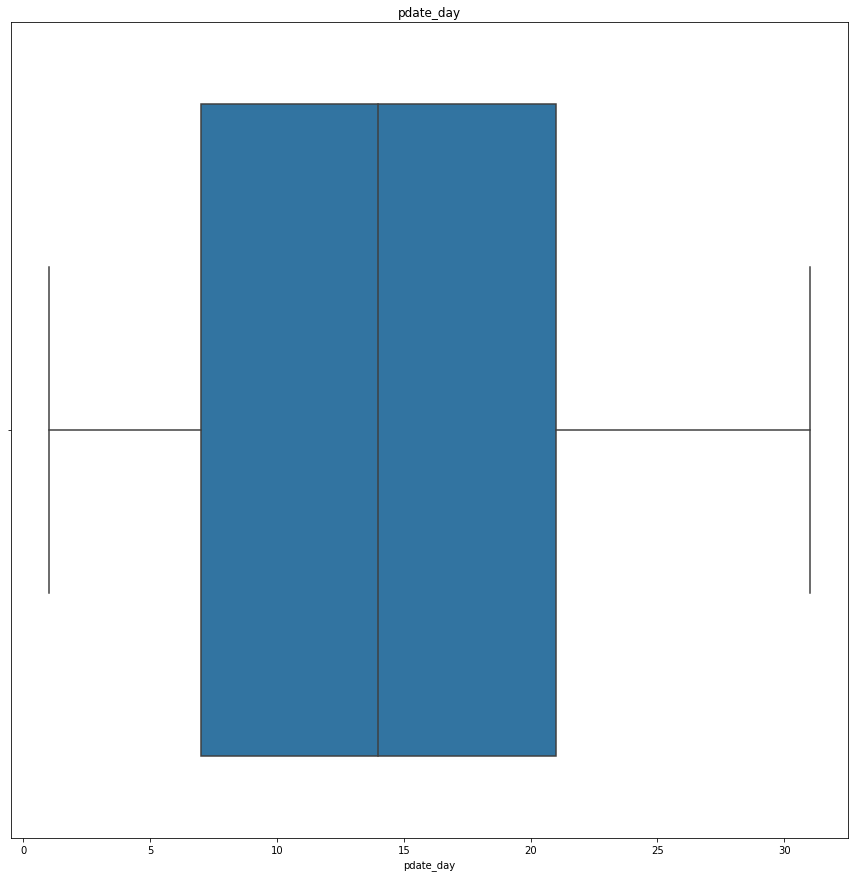

<Figure size 1080x1080 with 0 Axes>

In [70]:
for feature in continuous_feature:
    data=df1.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# now the number of outliers are reduced 

In [71]:
df1.to_csv("samplle992020.csv", index = False)

In [72]:
df1 = pd.read_csv("samplle9920201.csv")

In [73]:
df1.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,medianamnt_loans30imp,pdate_monthimp,medianamnt_loans90imp,labels
0,220.13,2,1539.0,2,21,7.50,0,2,12,0.0,12,3,0.0,11.000000,7,20,3,2,3,0
1,3691.26,1,4232.0,1,0,61.04,0,1,12,0.0,12,2,0.0,0.000000,8,10,3,1,3,1
2,900.13,1,1539.0,1,0,66.32,0,1,6,0.0,6,3,0.0,0.000000,8,19,3,1,3,1
3,159.42,0,0.0,1,0,2.50,0,2,12,0.0,12,3,0.0,0.000000,6,6,3,2,3,1
4,1098.90,7,2309.0,8,2,35.00,0,7,42,0.0,42,3,0.0,2.333333,6,22,3,2,3,1


In [74]:
df1.corr(method = "spearman")

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,medianamnt_loans30imp,pdate_monthimp,medianamnt_loans90imp,labels
rental30,1.000000,0.428982,0.212970,0.491636,0.136195,0.124436,0.069360,0.321857,0.363745,-0.025779,0.434291,-0.283829,-0.053434,0.284810,0.460825,0.095050,0.024912,-0.245960,0.052755,0.114912
cnt_ma_rech30,0.428982,1.000000,0.238515,0.918207,0.210208,0.329218,0.016845,0.728981,0.735885,-0.055258,0.720149,-0.177181,-0.069365,0.528680,0.201579,0.093389,0.053872,-0.080251,0.068353,0.337385
medianamnt_ma_rech30,0.212970,0.238515,1.000000,0.242569,0.351548,0.307521,0.014673,0.156659,0.190326,0.037221,0.207220,-0.182266,0.022146,0.114562,0.093960,0.053442,-0.038347,-0.045316,-0.022993,0.229359
cnt_ma_rech90,0.491636,0.918207,0.242569,1.000000,0.252571,0.348657,0.014609,0.686612,0.709568,-0.043009,0.770114,-0.249742,-0.074511,0.495274,0.372692,0.065026,0.041643,-0.221515,0.073547,0.355376
fr_ma_rech90,0.136195,0.210208,0.351548,0.252571,1.000000,0.214259,0.005373,0.167566,0.172599,0.028227,0.205142,-0.051831,0.013208,0.237688,0.116949,0.048396,-0.029674,-0.034859,-0.014410,0.221395
medianmarechprebal90,0.124436,0.329218,0.307521,0.348657,0.214259,1.000000,-0.001456,0.157742,0.172796,0.054318,0.186407,-0.091894,0.047058,0.090925,0.093216,0.031565,-0.055047,-0.051781,-0.047742,0.237225
fr_da_rech90,0.069360,0.016845,0.014673,0.014609,0.005373,-0.001456,1.000000,0.020381,0.024877,-0.005799,0.026966,-0.027778,-0.002434,0.014788,0.023925,0.061843,0.005776,0.028007,0.002320,-0.007892
cnt_loans30,0.321857,0.728981,0.156659,0.686612,0.167566,0.157742,0.020381,1.000000,0.973255,-0.066477,0.905838,-0.079128,-0.088901,0.704233,0.115339,0.093786,0.063068,0.003919,0.086527,0.261118
amnt_loans30,0.363745,0.735885,0.190326,0.709568,0.172599,0.172796,0.024877,0.973255,1.000000,-0.050321,0.932749,-0.262706,-0.076980,0.682545,0.187394,0.093738,0.047212,-0.064789,0.074794,0.274954
medianamnt_loans30,-0.025779,-0.055258,0.037221,-0.043009,0.028227,0.054318,-0.005799,-0.066477,-0.050321,1.000000,-0.043158,-0.036129,0.886063,-0.050447,0.028585,0.001061,-0.999449,-0.046981,-0.884875,0.046397


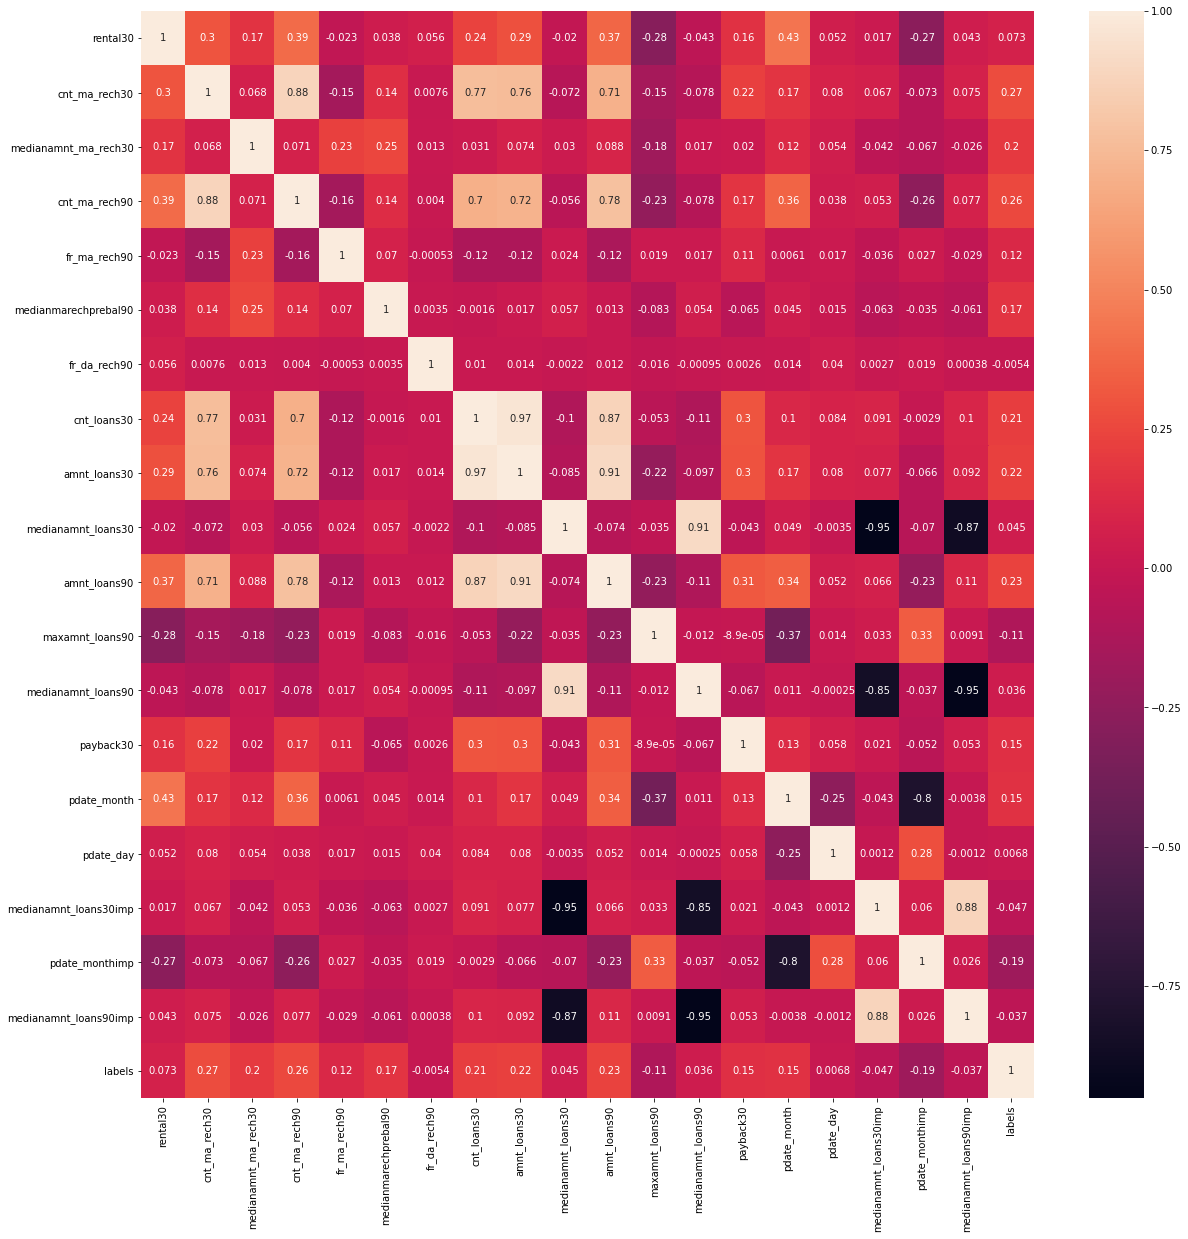

In [75]:
corrmat = df1.corr(method = "spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True)

# Now as per the heatmap the features seems to give some more importance to the output feature

In [76]:
X = df1.iloc[:, :-1]
Y = df1.iloc[:, -1]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [78]:
#Here the metrics for validating the model are imported.
# As this is an imbalanced dataset accuracy alone is not sufficient to look up to
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Now it is time to handle the imbalance

In [79]:
! pip install imblearn
# This is a library used to handle imbalanced dataset

# To handle the imbalanced dataset first Oversampling is done

In [80]:
# Here RandomOverSampler is imported to perform the task
from imblearn.over_sampling import RandomOverSampler

In [81]:
df1.head()

,rental30,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate_month,pdate_day,medianamnt_loans30imp,pdate_monthimp,medianamnt_loans90imp,labels
0,220.13,2,1539.0,2,21,7.50,0,2,12,0.0,12,3,0.0,11.000000,7,20,3,2,3,0
1,3691.26,1,4232.0,1,0,61.04,0,1,12,0.0,12,2,0.0,0.000000,8,10,3,1,3,1
2,900.13,1,1539.0,1,0,66.32,0,1,6,0.0,6,3,0.0,0.000000,8,19,3,1,3,1
3,159.42,0,0.0,1,0,2.50,0,2,12,0.0,12,3,0.0,0.000000,6,6,3,2,3,1
4,1098.90,7,2309.0,8,2,35.00,0,7,42,0.0,42,3,0.0,2.333333,6,22,3,2,3,1


In [82]:
# Here the process Oversampling is done is done for 75% of the larger feature
from collections import Counter
os=RandomOverSampler(0.75)
X_trainns,Y_trainns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(Y)))
print("The number of classes after fit {}".format(Counter(Y_trainns)))

C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({1: 183431, 0: 26162})
The number of classes after fit Counter({1: 146744, 0: 110058})


In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_trainns,Y_trainns)

RandomForestClassifier()

In [84]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2610  2622]
 [ 1969 34718]]
0.8904792576158782
              precision    recall  f1-score   support

           0       0.57      0.50      0.53      5232
           1       0.93      0.95      0.94     36687

    accuracy                           0.89     41919
   macro avg       0.75      0.72      0.74     41919
weighted avg       0.88      0.89      0.89     41919



#### In the above two cells a Random Forest Classifier model is used to predict and is not better

# Here as a next step SMOTE is used for a better result 

In [85]:
from imblearn.combine import SMOTETomek

In [86]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Admin\anaconda3\envs\practice\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({1: 146744, 0: 20930})
The number of classes after fit Counter({1: 143662, 0: 106976})


In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [88]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2881  2351]
 [ 2503 34184]]
0.8842052529879052
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      5232
           1       0.94      0.93      0.93     36687

    accuracy                           0.88     41919
   macro avg       0.74      0.74      0.74     41919
weighted avg       0.89      0.88      0.88     41919



In [89]:
print(accuracy_score(y_test,y_pred))

0.8842052529879052


##### For a backup as far as created Random Forest Classifier models the best is saved as piuckle file

In [90]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'rf1.pkl')

['rf1.pkl']

# Upnext one of the best models existing is used which is the Catboost model trained on the SMOTE outputted samples

In [91]:
from catboost import CatBoostClassifier

In [92]:
cat = CatBoostClassifier(iterations=2000, learning_rate= 0.05)

In [93]:
cat.fit(X_train_ns, y_train_ns)

0:	learn: 0.6474399	total: 92.4ms	remaining: 3m 4s
1:	learn: 0.6056277	total: 138ms	remaining: 2m 17s
2:	learn: 0.5724149	total: 175ms	remaining: 1m 56s
3:	learn: 0.5452353	total: 212ms	remaining: 1m 45s
4:	learn: 0.5252343	total: 248ms	remaining: 1m 39s
5:	learn: 0.5087454	total: 283ms	remaining: 1m 34s
6:	learn: 0.4926999	total: 339ms	remaining: 1m 36s
7:	learn: 0.4806750	total: 387ms	remaining: 1m 36s
8:	learn: 0.4653816	total: 432ms	remaining: 1m 35s
9:	learn: 0.4560368	total: 468ms	remaining: 1m 33s
10:	learn: 0.4481516	total: 521ms	remaining: 1m 34s
11:	learn: 0.4410616	total: 557ms	remaining: 1m 32s
12:	learn: 0.4310728	total: 605ms	remaining: 1m 32s
13:	learn: 0.4239619	total: 650ms	remaining: 1m 32s
14:	learn: 0.4186595	total: 702ms	remaining: 1m 32s
15:	learn: 0.4138233	total: 741ms	remaining: 1m 31s
16:	learn: 0.4094453	total: 776ms	remaining: 1m 30s
17:	learn: 0.4045676	total: 813ms	remaining: 1m 29s
18:	learn: 0.4000927	total: 849ms	remaining: 1m 28s
19:	learn: 0.3969054	t

159:	learn: 0.2671653	total: 6.65s	remaining: 1m 16s
160:	learn: 0.2670879	total: 6.69s	remaining: 1m 16s
161:	learn: 0.2669654	total: 6.73s	remaining: 1m 16s
162:	learn: 0.2666124	total: 6.78s	remaining: 1m 16s
163:	learn: 0.2664962	total: 6.83s	remaining: 1m 16s
164:	learn: 0.2664187	total: 6.87s	remaining: 1m 16s
165:	learn: 0.2661718	total: 6.91s	remaining: 1m 16s
166:	learn: 0.2660846	total: 6.95s	remaining: 1m 16s
167:	learn: 0.2659850	total: 6.99s	remaining: 1m 16s
168:	learn: 0.2658916	total: 7.02s	remaining: 1m 16s
169:	learn: 0.2657082	total: 7.07s	remaining: 1m 16s
170:	learn: 0.2655932	total: 7.12s	remaining: 1m 16s
171:	learn: 0.2653226	total: 7.16s	remaining: 1m 16s
172:	learn: 0.2652290	total: 7.21s	remaining: 1m 16s
173:	learn: 0.2651037	total: 7.25s	remaining: 1m 16s
174:	learn: 0.2649935	total: 7.29s	remaining: 1m 16s
175:	learn: 0.2646612	total: 7.34s	remaining: 1m 16s
176:	learn: 0.2645645	total: 7.38s	remaining: 1m 15s
177:	learn: 0.2642127	total: 7.42s	remaining: 

315:	learn: 0.2474735	total: 12.9s	remaining: 1m 8s
316:	learn: 0.2474299	total: 13s	remaining: 1m 8s
317:	learn: 0.2472258	total: 13s	remaining: 1m 8s
318:	learn: 0.2471258	total: 13.1s	remaining: 1m 8s
319:	learn: 0.2470804	total: 13.1s	remaining: 1m 8s
320:	learn: 0.2469430	total: 13.1s	remaining: 1m 8s
321:	learn: 0.2468835	total: 13.2s	remaining: 1m 8s
322:	learn: 0.2468249	total: 13.2s	remaining: 1m 8s
323:	learn: 0.2467099	total: 13.3s	remaining: 1m 8s
324:	learn: 0.2466756	total: 13.3s	remaining: 1m 8s
325:	learn: 0.2465886	total: 13.3s	remaining: 1m 8s
326:	learn: 0.2465298	total: 13.4s	remaining: 1m 8s
327:	learn: 0.2464288	total: 13.4s	remaining: 1m 8s
328:	learn: 0.2462559	total: 13.5s	remaining: 1m 8s
329:	learn: 0.2462173	total: 13.5s	remaining: 1m 8s
330:	learn: 0.2461688	total: 13.5s	remaining: 1m 8s
331:	learn: 0.2460874	total: 13.6s	remaining: 1m 8s
332:	learn: 0.2460532	total: 13.6s	remaining: 1m 8s
333:	learn: 0.2460142	total: 13.6s	remaining: 1m 8s
334:	learn: 0.24

476:	learn: 0.2386081	total: 20.2s	remaining: 1m 4s
477:	learn: 0.2385762	total: 20.2s	remaining: 1m 4s
478:	learn: 0.2383984	total: 20.3s	remaining: 1m 4s
479:	learn: 0.2383447	total: 20.3s	remaining: 1m 4s
480:	learn: 0.2382955	total: 20.3s	remaining: 1m 4s
481:	learn: 0.2382758	total: 20.4s	remaining: 1m 4s
482:	learn: 0.2382453	total: 20.4s	remaining: 1m 4s
483:	learn: 0.2381465	total: 20.5s	remaining: 1m 4s
484:	learn: 0.2381202	total: 20.5s	remaining: 1m 4s
485:	learn: 0.2381032	total: 20.6s	remaining: 1m 4s
486:	learn: 0.2380769	total: 20.6s	remaining: 1m 4s
487:	learn: 0.2380490	total: 20.7s	remaining: 1m 4s
488:	learn: 0.2380166	total: 20.7s	remaining: 1m 4s
489:	learn: 0.2379790	total: 20.8s	remaining: 1m 3s
490:	learn: 0.2379455	total: 20.8s	remaining: 1m 3s
491:	learn: 0.2379025	total: 20.9s	remaining: 1m 3s
492:	learn: 0.2378536	total: 20.9s	remaining: 1m 3s
493:	learn: 0.2377997	total: 20.9s	remaining: 1m 3s
494:	learn: 0.2376801	total: 21s	remaining: 1m 3s
495:	learn: 0.

639:	learn: 0.2333088	total: 28s	remaining: 59.5s
640:	learn: 0.2332779	total: 28.1s	remaining: 59.5s
641:	learn: 0.2332617	total: 28.1s	remaining: 59.5s
642:	learn: 0.2332326	total: 28.2s	remaining: 59.4s
643:	learn: 0.2332228	total: 28.2s	remaining: 59.4s
644:	learn: 0.2332091	total: 28.3s	remaining: 59.4s
645:	learn: 0.2331827	total: 28.3s	remaining: 59.4s
646:	learn: 0.2331673	total: 28.4s	remaining: 59.3s
647:	learn: 0.2331495	total: 28.4s	remaining: 59.3s
648:	learn: 0.2331054	total: 28.5s	remaining: 59.3s
649:	learn: 0.2330842	total: 28.6s	remaining: 59.3s
650:	learn: 0.2330516	total: 28.6s	remaining: 59.3s
651:	learn: 0.2330240	total: 28.7s	remaining: 59.3s
652:	learn: 0.2330053	total: 28.7s	remaining: 59.3s
653:	learn: 0.2329586	total: 28.8s	remaining: 59.3s
654:	learn: 0.2329304	total: 28.8s	remaining: 59.2s
655:	learn: 0.2329033	total: 28.9s	remaining: 59.2s
656:	learn: 0.2328734	total: 29s	remaining: 59.2s
657:	learn: 0.2328561	total: 29s	remaining: 59.2s
658:	learn: 0.2328

800:	learn: 0.2294323	total: 36.2s	remaining: 54.2s
801:	learn: 0.2294138	total: 36.2s	remaining: 54.1s
802:	learn: 0.2293908	total: 36.3s	remaining: 54.1s
803:	learn: 0.2293263	total: 36.3s	remaining: 54s
804:	learn: 0.2293067	total: 36.4s	remaining: 54s
805:	learn: 0.2292841	total: 36.4s	remaining: 54s
806:	learn: 0.2292580	total: 36.5s	remaining: 54s
807:	learn: 0.2292421	total: 36.6s	remaining: 53.9s
808:	learn: 0.2292276	total: 36.6s	remaining: 53.9s
809:	learn: 0.2292004	total: 36.7s	remaining: 53.9s
810:	learn: 0.2291816	total: 36.8s	remaining: 53.9s
811:	learn: 0.2291374	total: 36.8s	remaining: 53.8s
812:	learn: 0.2291177	total: 36.8s	remaining: 53.8s
813:	learn: 0.2291009	total: 36.9s	remaining: 53.7s
814:	learn: 0.2290751	total: 36.9s	remaining: 53.7s
815:	learn: 0.2290559	total: 37s	remaining: 53.7s
816:	learn: 0.2290383	total: 37s	remaining: 53.6s
817:	learn: 0.2289972	total: 37.1s	remaining: 53.6s
818:	learn: 0.2289591	total: 37.1s	remaining: 53.6s
819:	learn: 0.2289441	to

959:	learn: 0.2261581	total: 43.5s	remaining: 47.1s
960:	learn: 0.2261364	total: 43.6s	remaining: 47.1s
961:	learn: 0.2261272	total: 43.6s	remaining: 47.1s
962:	learn: 0.2260721	total: 43.7s	remaining: 47s
963:	learn: 0.2260522	total: 43.7s	remaining: 47s
964:	learn: 0.2260377	total: 43.8s	remaining: 46.9s
965:	learn: 0.2260181	total: 43.8s	remaining: 46.9s
966:	learn: 0.2259730	total: 43.8s	remaining: 46.8s
967:	learn: 0.2259555	total: 43.9s	remaining: 46.8s
968:	learn: 0.2259390	total: 44s	remaining: 46.8s
969:	learn: 0.2259252	total: 44s	remaining: 46.7s
970:	learn: 0.2258823	total: 44.1s	remaining: 46.7s
971:	learn: 0.2258698	total: 44.1s	remaining: 46.6s
972:	learn: 0.2258534	total: 44.1s	remaining: 46.6s
973:	learn: 0.2258354	total: 44.2s	remaining: 46.6s
974:	learn: 0.2258135	total: 44.3s	remaining: 46.5s
975:	learn: 0.2258007	total: 44.3s	remaining: 46.5s
976:	learn: 0.2257842	total: 44.3s	remaining: 46.4s
977:	learn: 0.2257645	total: 44.4s	remaining: 46.4s
978:	learn: 0.225754

1118:	learn: 0.2233716	total: 50.4s	remaining: 39.7s
1119:	learn: 0.2233588	total: 50.4s	remaining: 39.6s
1120:	learn: 0.2233435	total: 50.5s	remaining: 39.6s
1121:	learn: 0.2233291	total: 50.5s	remaining: 39.5s
1122:	learn: 0.2233131	total: 50.6s	remaining: 39.5s
1123:	learn: 0.2233011	total: 50.6s	remaining: 39.4s
1124:	learn: 0.2232864	total: 50.6s	remaining: 39.4s
1125:	learn: 0.2232769	total: 50.7s	remaining: 39.3s
1126:	learn: 0.2232342	total: 50.7s	remaining: 39.3s
1127:	learn: 0.2232213	total: 50.8s	remaining: 39.2s
1128:	learn: 0.2232128	total: 50.8s	remaining: 39.2s
1129:	learn: 0.2232088	total: 50.8s	remaining: 39.1s
1130:	learn: 0.2231980	total: 50.9s	remaining: 39.1s
1131:	learn: 0.2231801	total: 50.9s	remaining: 39s
1132:	learn: 0.2231566	total: 51s	remaining: 39s
1133:	learn: 0.2231351	total: 51s	remaining: 39s
1134:	learn: 0.2231231	total: 51s	remaining: 38.9s
1135:	learn: 0.2231087	total: 51.1s	remaining: 38.9s
1136:	learn: 0.2230973	total: 51.1s	remaining: 38.8s
1137:

1275:	learn: 0.2209632	total: 56.9s	remaining: 32.3s
1276:	learn: 0.2209460	total: 56.9s	remaining: 32.2s
1277:	learn: 0.2209179	total: 57s	remaining: 32.2s
1278:	learn: 0.2209117	total: 57s	remaining: 32.1s
1279:	learn: 0.2208996	total: 57s	remaining: 32.1s
1280:	learn: 0.2208791	total: 57.1s	remaining: 32s
1281:	learn: 0.2208644	total: 57.1s	remaining: 32s
1282:	learn: 0.2208497	total: 57.2s	remaining: 31.9s
1283:	learn: 0.2208235	total: 57.2s	remaining: 31.9s
1284:	learn: 0.2208076	total: 57.2s	remaining: 31.8s
1285:	learn: 0.2207925	total: 57.3s	remaining: 31.8s
1286:	learn: 0.2207796	total: 57.3s	remaining: 31.8s
1287:	learn: 0.2207678	total: 57.4s	remaining: 31.7s
1288:	learn: 0.2207612	total: 57.4s	remaining: 31.7s
1289:	learn: 0.2207407	total: 57.4s	remaining: 31.6s
1290:	learn: 0.2207319	total: 57.5s	remaining: 31.6s
1291:	learn: 0.2207217	total: 57.5s	remaining: 31.5s
1292:	learn: 0.2207053	total: 57.5s	remaining: 31.5s
1293:	learn: 0.2206908	total: 57.6s	remaining: 31.4s
129

1434:	learn: 0.2186655	total: 1m 3s	remaining: 25s
1435:	learn: 0.2186512	total: 1m 3s	remaining: 24.9s
1436:	learn: 0.2186407	total: 1m 3s	remaining: 24.9s
1437:	learn: 0.2186314	total: 1m 3s	remaining: 24.9s
1438:	learn: 0.2186186	total: 1m 3s	remaining: 24.8s
1439:	learn: 0.2186043	total: 1m 3s	remaining: 24.8s
1440:	learn: 0.2185917	total: 1m 3s	remaining: 24.7s
1441:	learn: 0.2185583	total: 1m 3s	remaining: 24.7s
1442:	learn: 0.2185561	total: 1m 3s	remaining: 24.6s
1443:	learn: 0.2185386	total: 1m 3s	remaining: 24.6s
1444:	learn: 0.2185249	total: 1m 3s	remaining: 24.5s
1445:	learn: 0.2185091	total: 1m 3s	remaining: 24.5s
1446:	learn: 0.2184874	total: 1m 3s	remaining: 24.4s
1447:	learn: 0.2184732	total: 1m 3s	remaining: 24.4s
1448:	learn: 0.2184564	total: 1m 4s	remaining: 24.3s
1449:	learn: 0.2184443	total: 1m 4s	remaining: 24.3s
1450:	learn: 0.2184305	total: 1m 4s	remaining: 24.3s
1451:	learn: 0.2184177	total: 1m 4s	remaining: 24.2s
1452:	learn: 0.2184040	total: 1m 4s	remaining: 2

1592:	learn: 0.2165463	total: 1m 10s	remaining: 18s
1593:	learn: 0.2165328	total: 1m 10s	remaining: 18s
1594:	learn: 0.2165229	total: 1m 10s	remaining: 17.9s
1595:	learn: 0.2165076	total: 1m 10s	remaining: 17.9s
1596:	learn: 0.2164971	total: 1m 10s	remaining: 17.8s
1597:	learn: 0.2164864	total: 1m 10s	remaining: 17.8s
1598:	learn: 0.2164738	total: 1m 10s	remaining: 17.8s
1599:	learn: 0.2164723	total: 1m 10s	remaining: 17.7s
1600:	learn: 0.2164652	total: 1m 10s	remaining: 17.7s
1601:	learn: 0.2164555	total: 1m 10s	remaining: 17.6s
1602:	learn: 0.2164482	total: 1m 11s	remaining: 17.6s
1603:	learn: 0.2164454	total: 1m 11s	remaining: 17.6s
1604:	learn: 0.2164386	total: 1m 11s	remaining: 17.5s
1605:	learn: 0.2164291	total: 1m 11s	remaining: 17.5s
1606:	learn: 0.2164138	total: 1m 11s	remaining: 17.4s
1607:	learn: 0.2164026	total: 1m 11s	remaining: 17.4s
1608:	learn: 0.2163950	total: 1m 11s	remaining: 17.3s
1609:	learn: 0.2163831	total: 1m 11s	remaining: 17.3s
1610:	learn: 0.2163733	total: 1m

1749:	learn: 0.2145690	total: 1m 19s	remaining: 11.3s
1750:	learn: 0.2145425	total: 1m 19s	remaining: 11.2s
1751:	learn: 0.2145325	total: 1m 19s	remaining: 11.2s
1752:	learn: 0.2145121	total: 1m 19s	remaining: 11.2s
1753:	learn: 0.2144956	total: 1m 19s	remaining: 11.1s
1754:	learn: 0.2144848	total: 1m 19s	remaining: 11.1s
1755:	learn: 0.2144669	total: 1m 19s	remaining: 11s
1756:	learn: 0.2144581	total: 1m 19s	remaining: 11s
1757:	learn: 0.2144494	total: 1m 19s	remaining: 10.9s
1758:	learn: 0.2144334	total: 1m 19s	remaining: 10.9s
1759:	learn: 0.2144187	total: 1m 19s	remaining: 10.8s
1760:	learn: 0.2144063	total: 1m 19s	remaining: 10.8s
1761:	learn: 0.2143969	total: 1m 19s	remaining: 10.8s
1762:	learn: 0.2143849	total: 1m 19s	remaining: 10.7s
1763:	learn: 0.2143735	total: 1m 19s	remaining: 10.7s
1764:	learn: 0.2143654	total: 1m 19s	remaining: 10.6s
1765:	learn: 0.2143558	total: 1m 19s	remaining: 10.6s
1766:	learn: 0.2143288	total: 1m 19s	remaining: 10.5s
1767:	learn: 0.2143200	total: 1m

1903:	learn: 0.2127702	total: 1m 26s	remaining: 4.34s
1904:	learn: 0.2127539	total: 1m 26s	remaining: 4.3s
1905:	learn: 0.2127460	total: 1m 26s	remaining: 4.25s
1906:	learn: 0.2127337	total: 1m 26s	remaining: 4.21s
1907:	learn: 0.2127257	total: 1m 26s	remaining: 4.16s
1908:	learn: 0.2127128	total: 1m 26s	remaining: 4.12s
1909:	learn: 0.2127034	total: 1m 26s	remaining: 4.07s
1910:	learn: 0.2126982	total: 1m 26s	remaining: 4.03s
1911:	learn: 0.2126886	total: 1m 26s	remaining: 3.98s
1912:	learn: 0.2126732	total: 1m 26s	remaining: 3.94s
1913:	learn: 0.2126553	total: 1m 26s	remaining: 3.89s
1914:	learn: 0.2126399	total: 1m 26s	remaining: 3.84s
1915:	learn: 0.2126314	total: 1m 26s	remaining: 3.8s
1916:	learn: 0.2126235	total: 1m 26s	remaining: 3.75s
1917:	learn: 0.2126116	total: 1m 26s	remaining: 3.71s
1918:	learn: 0.2126017	total: 1m 26s	remaining: 3.66s
1919:	learn: 0.2125872	total: 1m 26s	remaining: 3.62s
1920:	learn: 0.2125872	total: 1m 26s	remaining: 3.57s
1921:	learn: 0.2125788	total: 

In [94]:
from collections import Counter
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3317  1915]
 [ 3209 33478]]
0.8777642596435984
              precision    recall  f1-score   support

           0       0.51      0.63      0.56      5232
           1       0.95      0.91      0.93     36687

    accuracy                           0.88     41919
   macro avg       0.73      0.77      0.75     41919
weighted avg       0.89      0.88      0.88     41919



In [95]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(cat, 'cat1.pkl')

['cat1.pkl']

# Observations:
* The catboost classification model performed very well compared to others.
* This decision is taken based on the performance metrics used